In [16]:
import argparse
import sys
# sys.path.append('/home/cass/applications/yt')
import yt
import numpy as np
import pylab
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['figure.figsize'] = (12,9)

In [7]:
def _cfl(field, data):
    return ( data["velocity_x"] * (data["courant_time_step"]) / data["dx"] + 
             data["velocity_y"] * (data["courant_time_step"]) / data["dy"] + 
             data["velocity_z"] * (data["courant_time_step"]) / data["dz"] )

yt.add_field(("gas", "cfl"), function=_cfl, units="dimensionless")

/home/cwagner4/applications/miniconda3/lib/python3.6/site-packages/yt/fields/local_fields.py:46: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  warnings.warn("Because 'sampling_type' not specified, yt will "


In [34]:
idx_start = 1
idx_end = 2
didx = 1

colormap = 'arbre'
field = 'density'
center_mode = 'c'
dpi = 1000

code_units = { "length_unit":(1.0,"kpc"),
               "time_unit"  :(3.08567758096e+13,"s"),
               "mass_unit"  :(1.4690033e+36,"g") }

In [35]:
# ts1 = yt.load(['no_driv/Data_%06d'%idx for idx in range(idx_start,idx_end+1,didx)])

In [36]:
ts = yt.load(['Data_%06d'%idx for idx in range(idx_start,idx_end+1,didx)])

In [43]:
print(ts.outputs.index("mar6_run/"+"Data_000001"))

print(ds1)

1
Data_000000


In [17]:
ds1 = yt.load("Data_000000")
ds2 = yt.load("Data_000001")
# dsn = yt.load("mar6_run/Data_000101")

yt : [INFO     ] 2019-04-02 13:59:06,754 Parameters: current_time              = 1e-05
yt : [INFO     ] 2019-04-02 13:59:06,755 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-04-02 13:59:06,756 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-04-02 13:59:06,757 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-04-02 13:59:06,758 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-04-02 13:59:06,759 Parameters: current_redshift          = 99998.99999999999
yt : [INFO     ] 2019-04-02 13:59:06,759 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-04-02 13:59:06,760 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-04-02 13:59:06,761 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-04-02 13:59:07,069 Parameters: current_time              = 1.0000001841031177e-05
yt : [INFO     ] 2019-04-02 13:59:07,070 Parameters: domain_dimensions         = [256 256 256

In [8]:
v1=ds1.time_unit * 1.544e-13
v2=ds1.r[:].min("courant_time_step")
print(v1/v2)

1.5469793637308998e-08 dimensionless


In [17]:
cg1.get_data(["velocity_x","velocity_y","velocity_z","dx","dy","dz"])

In [26]:
CFL = cg1["velocity_x"] * (1e-5 * yt.units.second) / cg1["dx"] + cg1["velocity_y"] * (1e-5 * yt.units.second) / cg1["dy"] + cg1["velocity_z"] * (1e-5 * yt.units.second) / cg1["dz"] 
print(CFL.mean())

-2.0205997910192906e-21 dimensionless


In [24]:
print(cg1["velocity_x"].max())

3474144212.0975986 cm/s


In [26]:
cg1 = ds1.covering_grid(0, left_edge = [0.0,0.0,0.0], dims=[256,256,256])
cg2 = ds2.covering_grid(0, left_edge = [0.0,0.0,0.0], dims=[256,256,256])
# cgn = dsn.covering_grid(0, left_edge = [0.0,0.0,0.0], dims=[256,256,256])

In [27]:
cg1.get_data(["mach_number", "pressure", "density", "sound_speed", "velocity_magnitude", "total_energy","courant_time_step","cfl"])
cg2.get_data(["mach_number", "pressure", "density", "sound_speed", "velocity_magnitude", "total_energy","courant_time_step", "cfl"])
# cgn.get_data(["mach_number", "pressure", "density", "sound_speed", "velocity_magnitude", "total_energy","courant_time_step"])

In [29]:
pressure1 = cg1["pressure"]
M_s1 = cg1["mach_number"]
c_s1 = cg1["sound_speed"]
v_mag1 = cg1["velocity_magnitude"]
density1 = cg1["density"]
energy1 = cg1["total_energy"]
courant1 = cg1["courant_time_step"]
cfl1 = cg1["cfl"]
pressure2 = cg2["pressure"]
M_s2 = cg2["mach_number"]
c_s2 = cg2["sound_speed"]
v_mag2 = cg2["velocity_magnitude"]
density2 = cg2["density"]
energy2 = cg2["total_energy"]
courant2 = cg2["courant_time_step"]
cfl2 = cg2["cfl"]
# pressure_n = cgn["pressure"]
# M_s_n = cgn["mach_number"]
# c_s_n = cgn["sound_speed"]
# v_mag_n = cgn["velocity_magnitude"]
# density_n = cgn["density"]
# energy_n = cgn["total_energy"]
# courant_n = cgn["courant_time_step"]

In [31]:
print("CFL 1:",cfl1.mean(),cfl1.max(),cfl1.min())
print("CFL 2:",cfl2.mean(),cfl2.max(),cfl2.min())

CFL 1: 0.1523065154881867 dimensionless 2.735974427660092 dimensionless -2.6795139620137256 dimensionless
CFL 2: 0.15274700897154733 dimensionless 2.7303383905331198 dimensionless -2.673759470117414 dimensionless


In [30]:
print('Begin mean pressure:',pressure1.mean().in_cgs())
print('Begin mean mach number:',M_s1.mean())
print('Begin mean sound speed:',c_s1.mean())
print('Begin mean velocity magntiude:',v_mag1.mean())
print('Begin mean density:',density1.mean())
print('Begin mean total energy:',energy1.mean())
print('Begin mean courant time:',courant1.mean())

print('2 mean pressure:',pressure2.mean().in_cgs())
print('2 mean mach number:',M_s2.mean())
print('2 mean sound speed:',c_s2.mean())
print('2 mean velocity magntiude:',v_mag2.mean())
print('2 mean density:',density2.mean())
print('2 mean total energy:',energy2.mean())
print('2 mean courant time:',courant2.mean())


print('Last mean pressure:',pressure_n.mean().in_cgs())
print('Last mean mach number:',M_s_n.mean())
print('Last mean sound speed:',c_s_n.mean())
print('Last mean velocity magntiude:',v_mag_n.mean())
print('Last mean density:',density_n.mean())
print('Last mean total energy:',energy_n.mean())
print('Last mean courant time:',courant_n.mean())


# print('Calculated density:',(pressure2.mean()/v_mag2.mean()**2).in_cgs())
# print('Calculated pressure:',(1.001-1.0)*(energy2.mean()*density2.mean()).in_cgs())

# calc_cs = np.sqrt(1.001e-4*(1.001-1.0)*(energy2.mean()*density2.mean()).in_cgs()/density2.mean()).in_cgs()

# print('Calculated sound speed:',calc_cs)
# print('Calculated mach number:',(v_mag2.mean() / calc_cs).in_cgs())

Begin mean pressure: 9.204563475736059e-16 g/(cm*s**2)
Begin mean mach number: 8.396326319668772 dimensionless
Begin mean sound speed: 21167568.311640806 cm/s
Begin mean velocity magntiude: 177219042.25657433 cm/s
Begin mean density: 9.204563475988708e-30 g/cm**3
Begin mean total energy: 7.605551611341714e+17 erg/g
Begin mean courant time: 195598331352493.2 s
2 mean pressure: 9.206905746021704e-16 g/(cm*s**2)
2 mean mach number: 8.370744243154352 dimensionless
2 mean sound speed: 21068266.952300087 cm/s
2 mean velocity magntiude: 175717777.88118836 cm/s
2 mean density: 9.204563476054355e-30 g/cm**3
2 mean total energy: 7.461135501673553e+17 erg/g
2 mean courant time: 195855864287819.12 s
Last mean pressure: 9.42857088216032e-16 g/(cm*s**2)
Last mean mach number: 5.873083899798367 dimensionless
Last mean sound speed: 14886126.287267696 cm/s
Last mean velocity magntiude: 80192168.90295641 cm/s
Last mean density: 9.204564012915019e-30 g/cm**3
Last mean total energy: 2.813857642231854e+17 

In [27]:
print(pressure2.mean()/pressure1.mean())
print(M_s2.mean()/M_s1.mean())
print(c_s2.mean()/c_s1.mean())
print(v_mag2.mean()/v_mag1.mean())
print(density2.mean()/density1.mean())
print(energy2.mean()/energy1.mean())

1.0008006967008034 dimensionless
1.0001064345541018 dimensionless
0.9998452611025274 dimensionless
1.000035066715004 dimensionless
0.9999999995224894 dimensionless
1.007246148494913 dimensionless


In [10]:
# ds.fields.gas.sound_speed.get_source()

In [9]:
# print(ds.r[:].argmax("mach_number"))
# print(ds.r[:].argmax("sound_speed"))

yt : [INFO     ] 2019-04-02 14:15:27,568 Parameters: current_time              = 1.0005325613361892e-05
yt : [INFO     ] 2019-04-02 14:15:27,568 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-04-02 14:15:27,569 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-04-02 14:15:27,570 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-04-02 14:15:27,571 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-04-02 14:15:27,571 Parameters: current_redshift          = 99945.77221344221
yt : [INFO     ] 2019-04-02 14:15:27,572 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-04-02 14:15:27,573 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-04-02 14:15:27,573 Parameters: hubble_constant           = 0.7



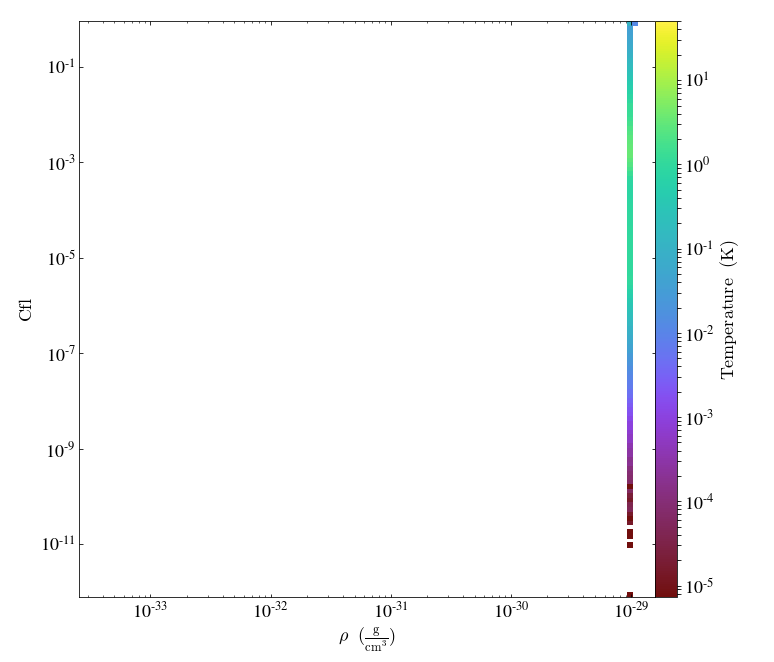

yt : [INFO     ] 2019-04-02 14:15:48,756 Parameters: current_time              = 1.0011506478603843e-05
yt : [INFO     ] 2019-04-02 14:15:48,757 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-04-02 14:15:48,758 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-04-02 14:15:48,759 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-04-02 14:15:48,760 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-04-02 14:15:48,760 Parameters: current_redshift          = 99884.06746084185
yt : [INFO     ] 2019-04-02 14:15:48,761 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-04-02 14:15:48,762 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-04-02 14:15:48,763 Parameters: hubble_constant           = 0.7



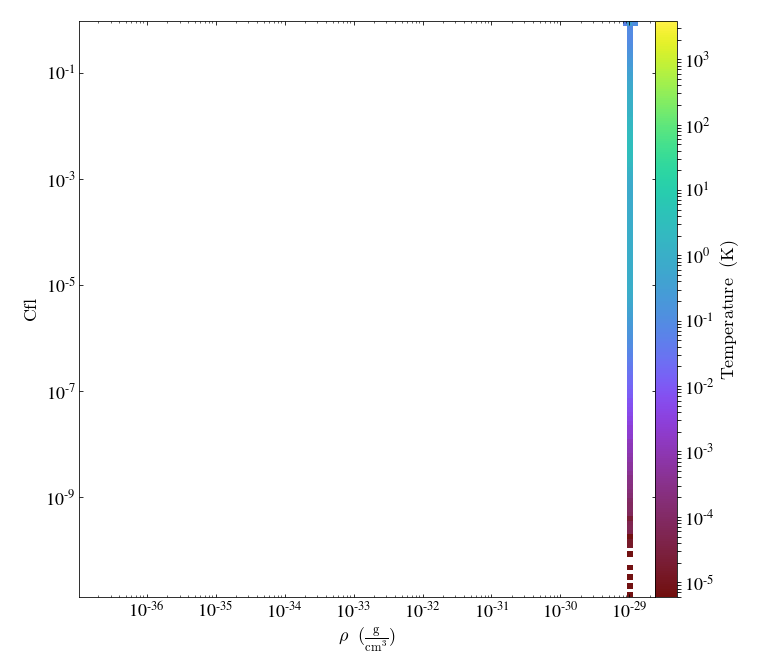

In [37]:
for ds in ts.piter():

    ad = ds.all_data()
    plot = yt.PhasePlot(ad, "density", "cfl", ["temperature"], weight_field=None)
#     plot.set_zlim("temperature",1e3,2e11)
#     plot.set_xlim(1e-33,1e-26)
#     plot.set_ylim(1e-8,1e2)
    plot.show()
#     plot.save(name=str(ds)+'_CFL_condition.png')

yt : [INFO     ] 2019-04-02 14:06:39,614 Parameters: current_time              = 1e-05
yt : [INFO     ] 2019-04-02 14:06:39,615 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-04-02 14:06:39,615 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-04-02 14:06:39,616 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-04-02 14:06:39,617 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-04-02 14:06:39,618 Parameters: current_redshift          = 99998.99999999999
yt : [INFO     ] 2019-04-02 14:06:39,619 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-04-02 14:06:39,620 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-04-02 14:06:39,620 Parameters: hubble_constant           = 0.7



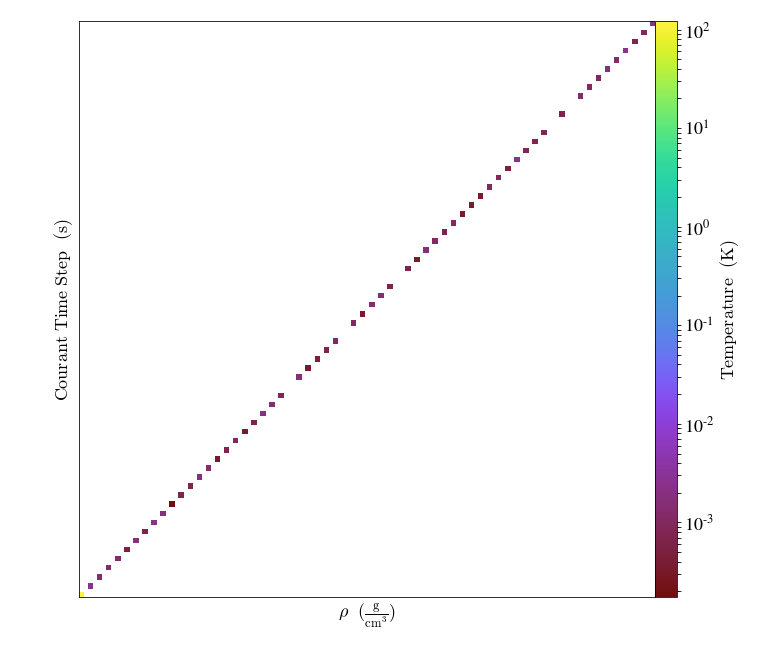

yt : [INFO     ] 2019-04-02 14:06:58,802 Parameters: current_time              = 1.0005325613361892e-05
yt : [INFO     ] 2019-04-02 14:06:58,803 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-04-02 14:06:58,803 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-04-02 14:06:58,804 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-04-02 14:06:58,805 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-04-02 14:06:58,806 Parameters: current_redshift          = 99945.77221344221
yt : [INFO     ] 2019-04-02 14:06:58,807 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-04-02 14:06:58,807 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-04-02 14:06:58,808 Parameters: hubble_constant           = 0.7



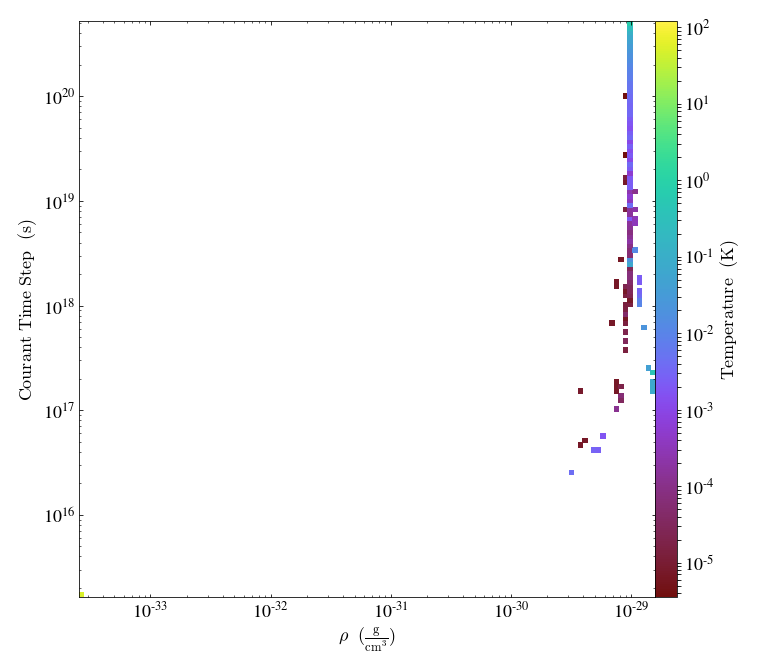

In [33]:
for ds in ts.piter():

    ad = ds.all_data()
    plot = yt.PhasePlot(ad, "density", "courant_time_step", ["temperature"], weight_field=None)
#     plot.set_zlim("temperature",1e3,2e11)
#     plot.set_xlim(1e-33,1e-26)
#     plot.set_ylim(1e12,2e16)
    plot.show()
#     plot.save(name=str(ds)+'_courant_time_step.png')

In [ ]:
### Lists to hold profiles, labels, and plot specifications.
profiles = []
labels = []
plot_specs = []

# Loop over each dataset in the time-series.
for ds in ts.piter():
    # Create a data container to hold the whole dataset.
    ad = ds.all_data()
    # Create a 1d profile of density vs. temperature.
    profiles.append(yt.create_profile(ad, ["density"],
                                   fields=["density"], weight_field=None,
                                     fractional=True))
    # Add labels and linestyles.
    labels.append("t = %.2f" % ds.current_time)
    plot_specs.append(dict(linewidth=2, alpha=0.7))

# Create the profile plot from the list of profiles.
plot = yt.ProfilePlot.from_profiles(profiles, labels=labels,
                                 plot_specs=plot_specs)

plot.show()

yt : [INFO     ] 2019-04-02 14:20:56,637 Parameters: current_time              = 1.0005325613361892e-05
yt : [INFO     ] 2019-04-02 14:20:56,638 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-04-02 14:20:56,639 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-04-02 14:20:56,640 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-04-02 14:20:56,641 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-04-02 14:20:56,642 Parameters: current_redshift          = 99945.77221344221
yt : [INFO     ] 2019-04-02 14:20:56,642 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-04-02 14:20:56,643 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-04-02 14:20:56,644 Parameters: hubble_constant           = 0.7



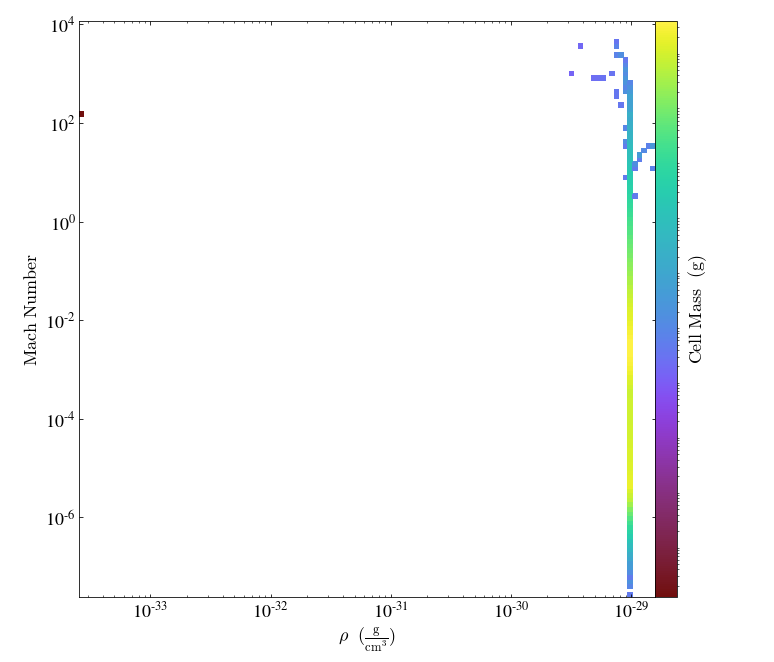

yt : [INFO     ] 2019-04-02 14:21:13,169 Parameters: current_time              = 1.0011506478603843e-05
yt : [INFO     ] 2019-04-02 14:21:13,170 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-04-02 14:21:13,171 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-04-02 14:21:13,172 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-04-02 14:21:13,173 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-04-02 14:21:13,174 Parameters: current_redshift          = 99884.06746084185
yt : [INFO     ] 2019-04-02 14:21:13,174 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-04-02 14:21:13,175 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-04-02 14:21:13,176 Parameters: hubble_constant           = 0.7



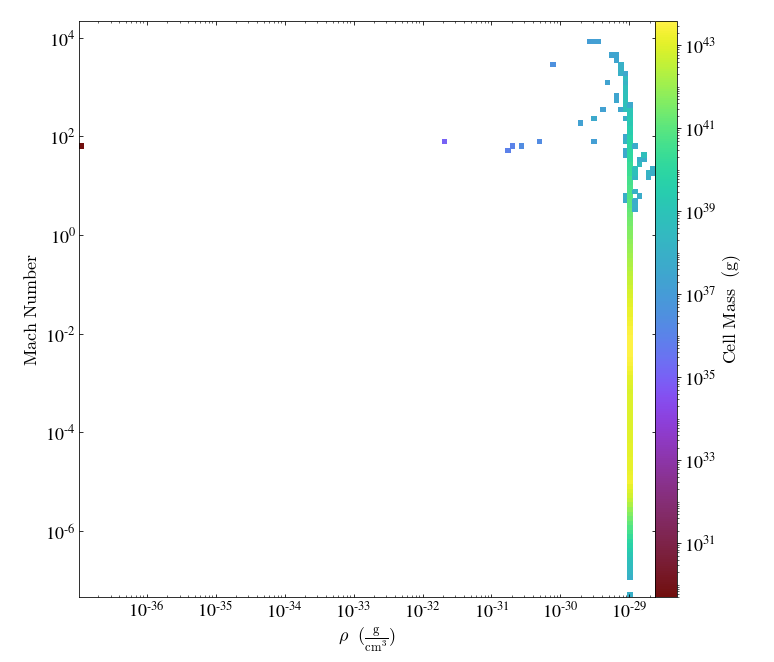

In [38]:
for ds in ts.piter():

    ad = ds.all_data()
    plot = yt.PhasePlot(ad, "density", "mach_number", ["cell_mass"], weight_field=None)
#     plot.set_zlim("cell_mass",1e34,1e43)
#     plot.set_xlim(1e-33,1e-26)
#     plot.set_ylim(1e-2,1e3)
    plot.show()
#     plot.save(name=str(ds)+'_2DPhase_dens_Ms.png')

yt : [INFO     ] 2019-04-02 14:21:30,715 Parameters: current_time              = 1.0005325613361892e-05
yt : [INFO     ] 2019-04-02 14:21:30,716 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-04-02 14:21:30,717 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-04-02 14:21:30,718 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-04-02 14:21:30,719 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-04-02 14:21:30,720 Parameters: current_redshift          = 99945.77221344221
yt : [INFO     ] 2019-04-02 14:21:30,720 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-04-02 14:21:30,721 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-04-02 14:21:30,722 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-04-02 14:21:33,090 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-04-02 14:21:33,091 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-04-02 14:21:33,092 xlim = 


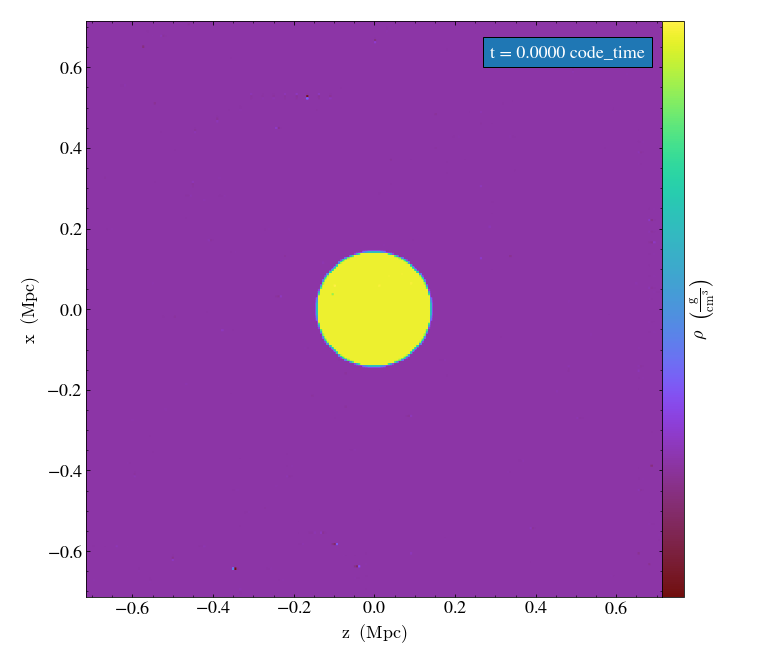

yt : [INFO     ] 2019-04-02 14:21:34,128 Parameters: current_time              = 1.0011506478603843e-05
yt : [INFO     ] 2019-04-02 14:21:34,129 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-04-02 14:21:34,130 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-04-02 14:21:34,131 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-04-02 14:21:34,132 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-04-02 14:21:34,133 Parameters: current_redshift          = 99884.06746084185
yt : [INFO     ] 2019-04-02 14:21:34,133 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-04-02 14:21:34,134 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-04-02 14:21:34,135 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-04-02 14:21:35,901 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-04-02 14:21:35,901 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-04-02 14:21:35,902 xlim = 


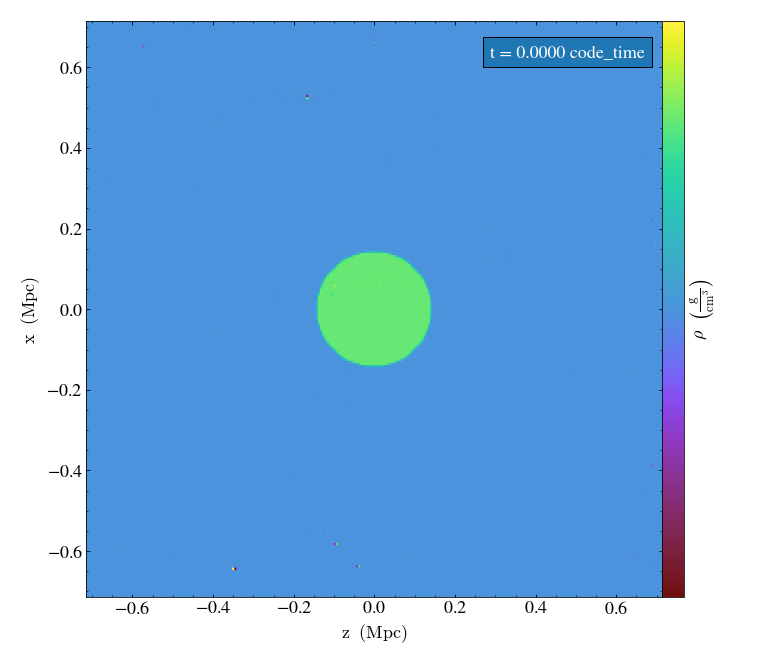

In [39]:
for ds in ts.piter():
    
    sz = yt.SlicePlot(ds,'y','density')
#     sz.set_zlim(field,1e-3,1e2)
    sz.set_log(field,True)
    sz.set_cmap(field,colormap)
#     sz.set_unit(field,'g/cm**3')
#     sz.set_axes_unit('kpc')
    sz.annotate_timestamp(time_unit='code_time',corner='upper_right',
                         time_format='t = {time:.4f} {units}')
#     sz.annotate_grids(periodic=False)
    sz.show()
#     sz.save(name=str(ds)+'_SlicePlot_Density.png')

yt : [WARNING  ] 2018-11-27 10:31:34,298 Cannot determine code units ==> Use units_override to specify the units
yt : [WARNING  ] 2018-11-27 10:31:34,299 Assuming length unit = 1.0 cm
yt : [WARNING  ] 2018-11-27 10:31:34,300 Assuming time unit = 1.0 s
yt : [WARNING  ] 2018-11-27 10:31:34,300 Assuming mass unit = 1.0 g
yt : [INFO     ] 2018-11-27 10:31:34,315 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-11-27 10:31:34,316 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-11-27 10:31:34,316 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-11-27 10:31:34,317 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-11-27 10:31:34,318 Parameters: cosmological_simulation   = 0



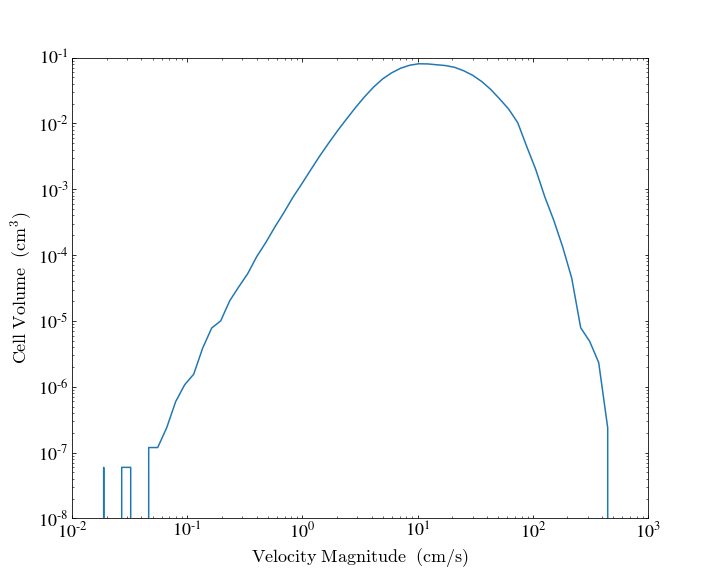

yt : [INFO     ] 2018-11-27 10:31:46,485 Saving Data_000000_PhasePlot.png
yt : [INFO     ] 2018-11-27 10:31:46,486 Saving plot Data_000000_PhasePlot.png
yt : [WARNING  ] 2018-11-27 10:31:46,998 Cannot determine code units ==> Use units_override to specify the units
yt : [WARNING  ] 2018-11-27 10:31:46,999 Assuming length unit = 1.0 cm
yt : [WARNING  ] 2018-11-27 10:31:47,000 Assuming time unit = 1.0 s
yt : [WARNING  ] 2018-11-27 10:31:47,000 Assuming mass unit = 1.0 g
yt : [INFO     ] 2018-11-27 10:31:47,010 Parameters: current_time              = 0.00014100351381785003
yt : [INFO     ] 2018-11-27 10:31:47,011 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-11-27 10:31:47,013 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-11-27 10:31:47,013 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-11-27 10:31:47,014 Parameters: cosmological_simulation   = 0



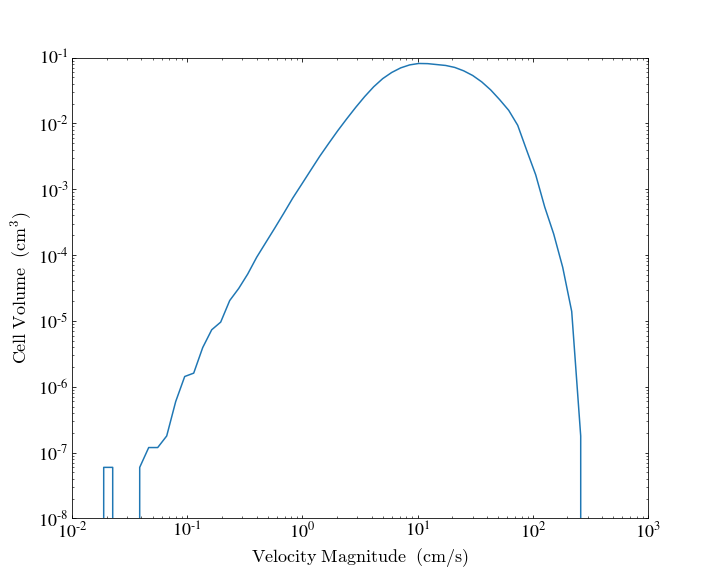

yt : [INFO     ] 2018-11-27 10:31:59,941 Saving Data_000001_PhasePlot.png
yt : [INFO     ] 2018-11-27 10:31:59,942 Saving plot Data_000001_PhasePlot.png
yt : [WARNING  ] 2018-11-27 10:32:00,490 Cannot determine code units ==> Use units_override to specify the units
yt : [WARNING  ] 2018-11-27 10:32:00,491 Assuming length unit = 1.0 cm
yt : [WARNING  ] 2018-11-27 10:32:00,492 Assuming time unit = 1.0 s
yt : [WARNING  ] 2018-11-27 10:32:00,492 Assuming mass unit = 1.0 g
yt : [INFO     ] 2018-11-27 10:32:00,501 Parameters: current_time              = 0.0003082022649323335
yt : [INFO     ] 2018-11-27 10:32:00,502 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-11-27 10:32:00,502 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-11-27 10:32:00,503 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-11-27 10:32:00,503 Parameters: cosmological_simulation   = 0



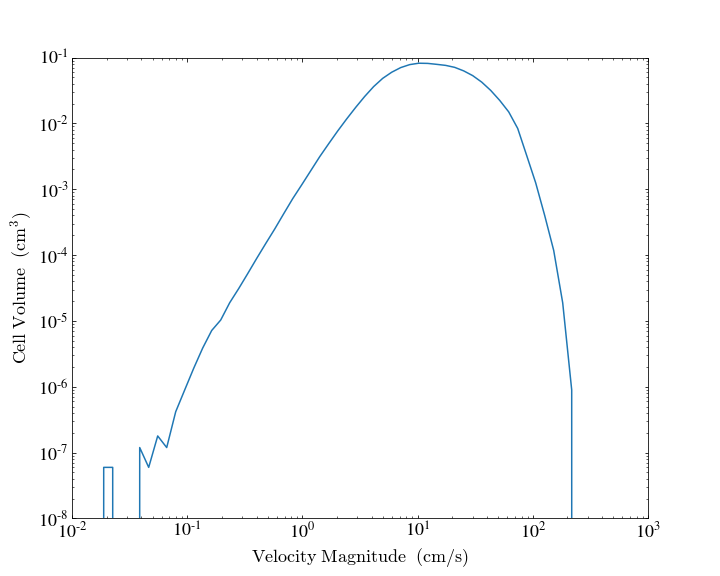

yt : [INFO     ] 2018-11-27 10:32:12,620 Saving Data_000002_PhasePlot.png
yt : [INFO     ] 2018-11-27 10:32:12,621 Saving plot Data_000002_PhasePlot.png
yt : [WARNING  ] 2018-11-27 10:32:13,056 Cannot determine code units ==> Use units_override to specify the units
yt : [WARNING  ] 2018-11-27 10:32:13,057 Assuming length unit = 1.0 cm
yt : [WARNING  ] 2018-11-27 10:32:13,058 Assuming time unit = 1.0 s
yt : [WARNING  ] 2018-11-27 10:32:13,058 Assuming mass unit = 1.0 g
yt : [INFO     ] 2018-11-27 10:32:13,073 Parameters: current_time              = 0.00045354423650678655
yt : [INFO     ] 2018-11-27 10:32:13,073 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-11-27 10:32:13,074 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-11-27 10:32:13,074 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-11-27 10:32:13,075 Parameters: cosmological_simulation   = 0



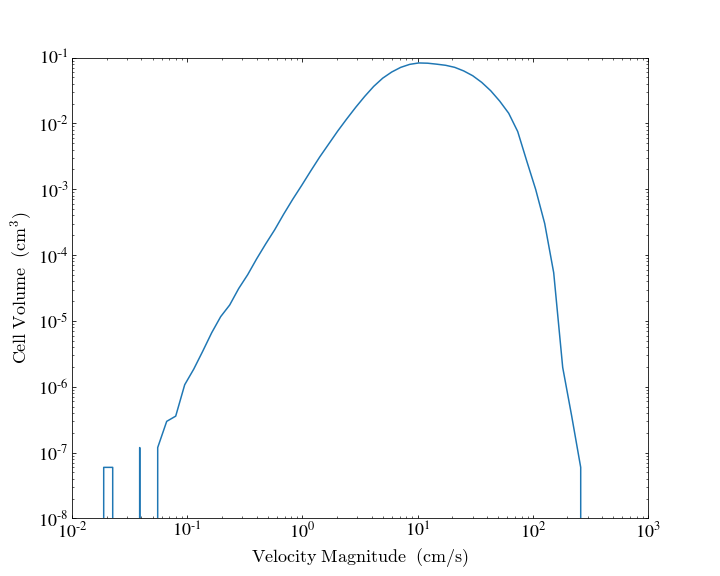

yt : [INFO     ] 2018-11-27 10:32:24,983 Saving Data_000003_PhasePlot.png
yt : [INFO     ] 2018-11-27 10:32:24,984 Saving plot Data_000003_PhasePlot.png
yt : [WARNING  ] 2018-11-27 10:32:25,483 Cannot determine code units ==> Use units_override to specify the units
yt : [WARNING  ] 2018-11-27 10:32:25,484 Assuming length unit = 1.0 cm
yt : [WARNING  ] 2018-11-27 10:32:25,485 Assuming time unit = 1.0 s
yt : [WARNING  ] 2018-11-27 10:32:25,486 Assuming mass unit = 1.0 g
yt : [INFO     ] 2018-11-27 10:32:25,499 Parameters: current_time              = 0.0005783348924524034
yt : [INFO     ] 2018-11-27 10:32:25,499 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-11-27 10:32:25,500 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-11-27 10:32:25,501 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-11-27 10:32:25,501 Parameters: cosmological_simulation   = 0



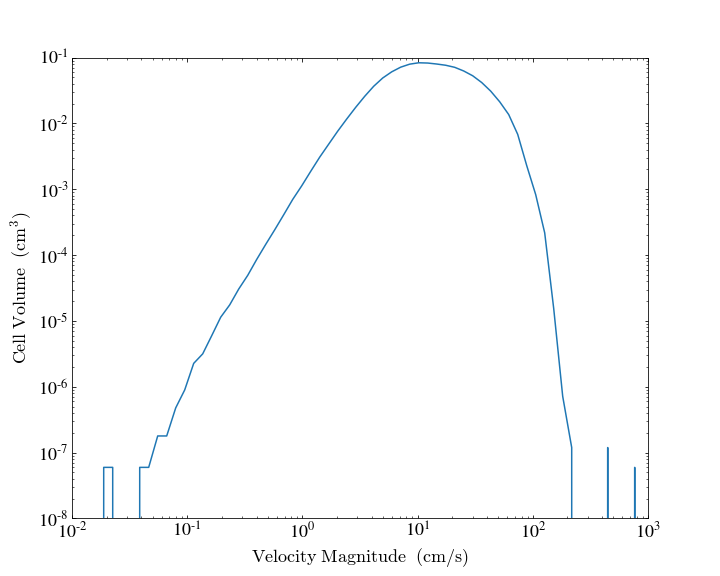

yt : [INFO     ] 2018-11-27 10:32:37,156 Saving Data_000004_PhasePlot.png
yt : [INFO     ] 2018-11-27 10:32:37,156 Saving plot Data_000004_PhasePlot.png
yt : [WARNING  ] 2018-11-27 10:32:37,637 Cannot determine code units ==> Use units_override to specify the units
yt : [WARNING  ] 2018-11-27 10:32:37,638 Assuming length unit = 1.0 cm
yt : [WARNING  ] 2018-11-27 10:32:37,639 Assuming time unit = 1.0 s
yt : [WARNING  ] 2018-11-27 10:32:37,640 Assuming mass unit = 1.0 g
yt : [INFO     ] 2018-11-27 10:32:37,651 Parameters: current_time              = 0.0007243608071348717
yt : [INFO     ] 2018-11-27 10:32:37,652 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-11-27 10:32:37,652 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-11-27 10:32:37,653 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-11-27 10:32:37,654 Parameters: cosmological_simulation   = 0



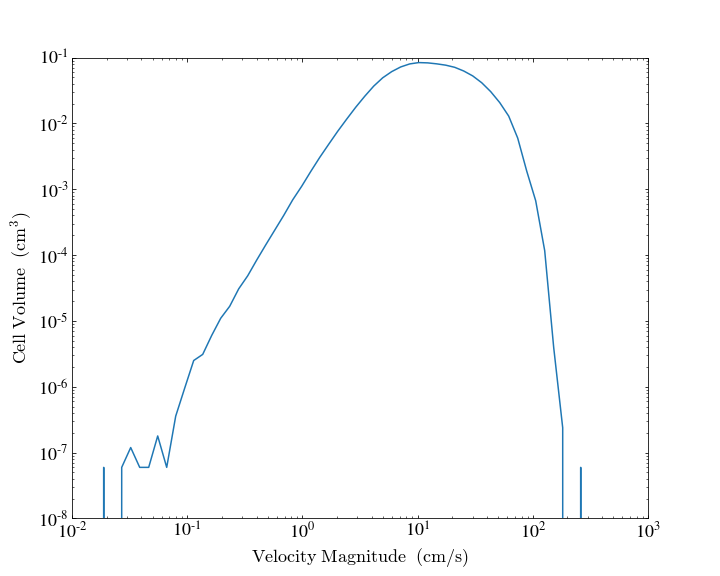

yt : [INFO     ] 2018-11-27 10:32:49,208 Saving Data_000005_PhasePlot.png
yt : [INFO     ] 2018-11-27 10:32:49,209 Saving plot Data_000005_PhasePlot.png
yt : [WARNING  ] 2018-11-27 10:32:49,640 Cannot determine code units ==> Use units_override to specify the units
yt : [WARNING  ] 2018-11-27 10:32:49,640 Assuming length unit = 1.0 cm
yt : [WARNING  ] 2018-11-27 10:32:49,641 Assuming time unit = 1.0 s
yt : [WARNING  ] 2018-11-27 10:32:49,642 Assuming mass unit = 1.0 g
yt : [INFO     ] 2018-11-27 10:32:49,651 Parameters: current_time              = 0.0009046984006545244
yt : [INFO     ] 2018-11-27 10:32:49,652 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-11-27 10:32:49,652 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-11-27 10:32:49,653 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-11-27 10:32:49,654 Parameters: cosmological_simulation   = 0



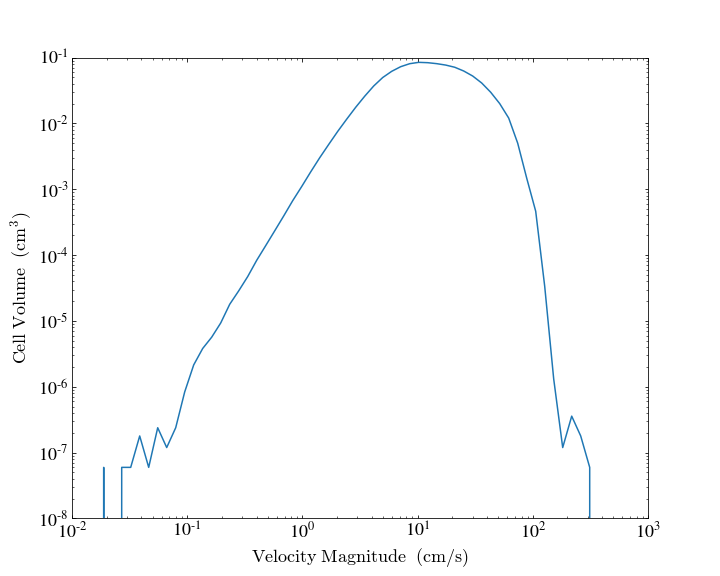

yt : [INFO     ] 2018-11-27 10:33:01,480 Saving Data_000006_PhasePlot.png
yt : [INFO     ] 2018-11-27 10:33:01,480 Saving plot Data_000006_PhasePlot.png


In [13]:
for ds in ts.piter():
    
    sz = ds.r[:].profile("velocity_magnitude", "cell_volume", weight_field=None).plot()
    sz.set_xlim(1e-2,1e3)
    sz.set_ylim('cell_volume',1e-8,1e-1)
    sz.show()
    sz.save(name=str(ds)+'_PhasePlot.png')

yt : [INFO     ] 2019-01-12 14:38:33,827 Parameters: current_time              = 1e-05
yt : [INFO     ] 2019-01-12 14:38:33,828 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-01-12 14:38:33,829 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-01-12 14:38:33,829 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-01-12 14:38:33,830 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-01-12 14:38:33,831 Parameters: current_redshift          = 99998.99999999999
yt : [INFO     ] 2019-01-12 14:38:33,831 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-01-12 14:38:33,832 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-01-12 14:38:33,832 Parameters: hubble_constant           = 0.7



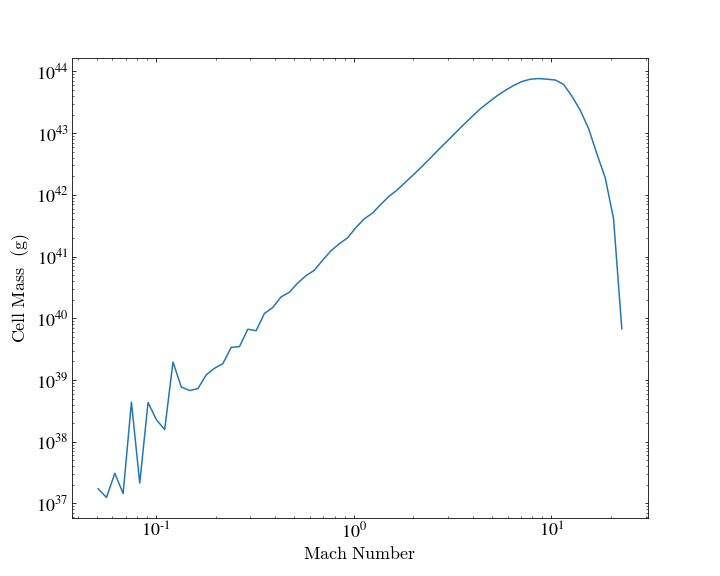

yt : [INFO     ] 2019-01-12 14:38:42,975 Parameters: current_time              = 1.0000000154400782e-05
yt : [INFO     ] 2019-01-12 14:38:42,975 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-01-12 14:38:42,976 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-01-12 14:38:42,977 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-01-12 14:38:42,978 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-01-12 14:38:42,978 Parameters: current_redshift          = 99998.9984559922
yt : [INFO     ] 2019-01-12 14:38:42,979 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-01-12 14:38:42,979 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-01-12 14:38:42,980 Parameters: hubble_constant           = 0.7
/home/cass/.local/lib/python3.7/site-packages/yt/units/yt_array.py:1373: RuntimeWarning: invalid value encountered in sqrt
  out_arr = func(np.asarray(inp), out=out, **kwargs)
/home


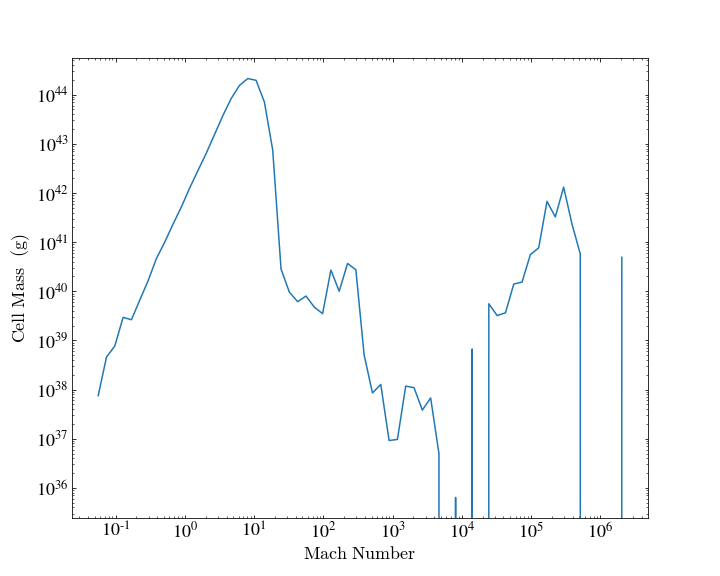

yt : [INFO     ] 2019-01-12 14:38:52,414 Parameters: current_time              = 1.0000000154401107e-05
yt : [INFO     ] 2019-01-12 14:38:52,415 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-01-12 14:38:52,415 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-01-12 14:38:52,416 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-01-12 14:38:52,417 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-01-12 14:38:52,417 Parameters: current_redshift          = 99998.99845598896
yt : [INFO     ] 2019-01-12 14:38:52,418 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-01-12 14:38:52,418 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-01-12 14:38:52,419 Parameters: hubble_constant           = 0.7
/home/cass/.local/lib/python3.7/site-packages/yt/units/yt_array.py:1373: RuntimeWarning: invalid value encountered in sqrt
  out_arr = func(np.asarray(inp), out=out, **kwargs)
/hom


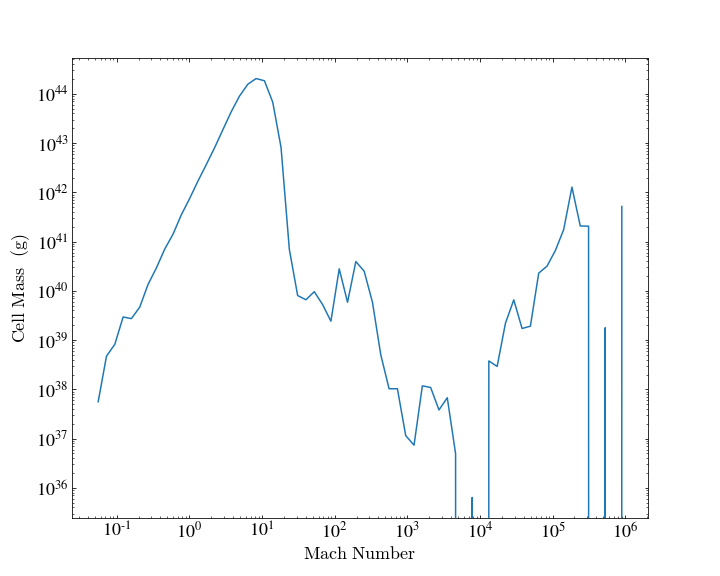

yt : [INFO     ] 2019-01-12 14:39:02,239 Parameters: current_time              = 1.0000000154401432e-05
yt : [INFO     ] 2019-01-12 14:39:02,240 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-01-12 14:39:02,241 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-01-12 14:39:02,241 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-01-12 14:39:02,242 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-01-12 14:39:02,243 Parameters: current_redshift          = 99998.9984559857
yt : [INFO     ] 2019-01-12 14:39:02,243 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-01-12 14:39:02,244 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-01-12 14:39:02,244 Parameters: hubble_constant           = 0.7
/home/cass/.local/lib/python3.7/site-packages/yt/units/yt_array.py:1373: RuntimeWarning: invalid value encountered in sqrt
  out_arr = func(np.asarray(inp), out=out, **kwargs)
/home


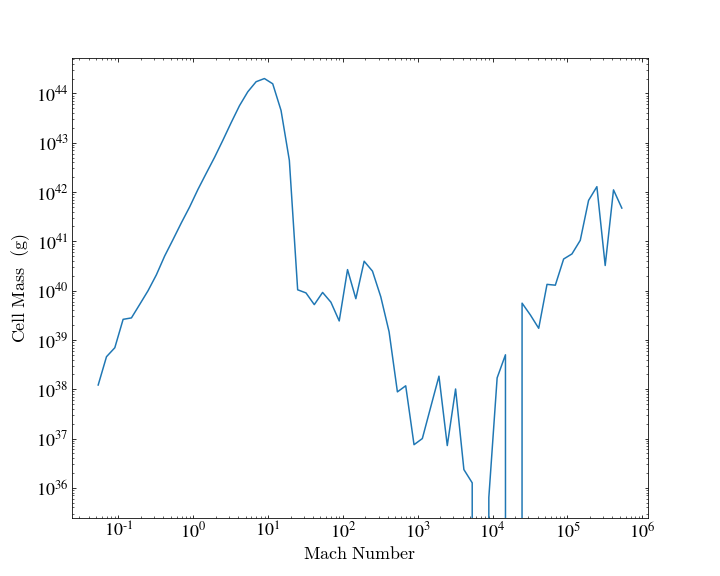

yt : [INFO     ] 2019-01-12 14:39:12,042 Parameters: current_time              = 1.0000000154401757e-05
yt : [INFO     ] 2019-01-12 14:39:12,043 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-01-12 14:39:12,044 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-01-12 14:39:12,045 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-01-12 14:39:12,046 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-01-12 14:39:12,047 Parameters: current_redshift          = 99998.99845598245
yt : [INFO     ] 2019-01-12 14:39:12,048 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-01-12 14:39:12,048 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-01-12 14:39:12,049 Parameters: hubble_constant           = 0.7
/home/cass/.local/lib/python3.7/site-packages/yt/units/yt_array.py:1373: RuntimeWarning: invalid value encountered in sqrt
  out_arr = func(np.asarray(inp), out=out, **kwargs)
/hom


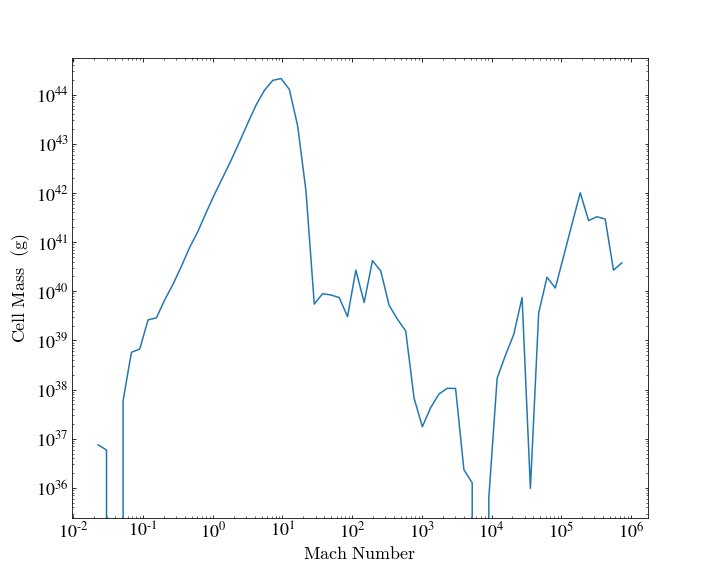

yt : [INFO     ] 2019-01-12 14:39:21,163 Parameters: current_time              = 1.0000000154402083e-05
yt : [INFO     ] 2019-01-12 14:39:21,164 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-01-12 14:39:21,165 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-01-12 14:39:21,165 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-01-12 14:39:21,166 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-01-12 14:39:21,167 Parameters: current_redshift          = 99998.99845597919
yt : [INFO     ] 2019-01-12 14:39:21,168 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-01-12 14:39:21,169 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-01-12 14:39:21,169 Parameters: hubble_constant           = 0.7
/home/cass/.local/lib/python3.7/site-packages/yt/units/yt_array.py:1373: RuntimeWarning: invalid value encountered in sqrt
  out_arr = func(np.asarray(inp), out=out, **kwargs)
/hom


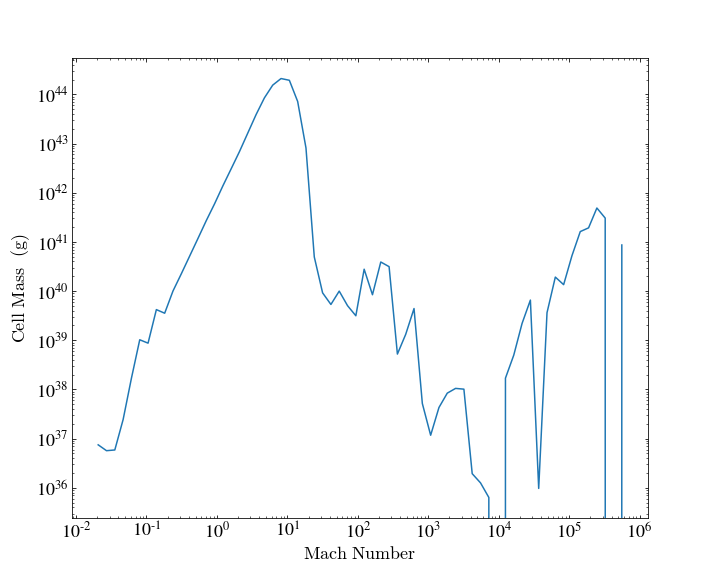

In [38]:
for ds in ts.piter():
    
    sz = ds.r[:].profile("mach_number", "cell_mass", weight_field=None).plot()
#     sz.set_xlim(1e-2,1e2)
#     sz.set_ylim('cell_mass',1e-9,1)
    sz.show()
#     sz.save(name=str(ds)+'_MassDist_Mach.png')

In [ ]:
for ds in ts.piter():
    
    sz = ds.r[:].profile("mach_number", "cell_mass", weight_field=None).plot()
    sz.set_xlim(1e-2,1e2)
#     sz.set_ylim('cell_mass',1e-9,1)
    sz.show()
#     sz.save(name=str(ds)+'_MassDist_Mach.png')

yt : [INFO     ] 2019-03-18 13:46:02,981 Parameters: current_time              = 1e-05
yt : [INFO     ] 2019-03-18 13:46:02,982 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 13:46:02,983 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 13:46:02,984 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 13:46:02,985 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 13:46:02,986 Parameters: current_redshift          = 99998.99999999999
yt : [INFO     ] 2019-03-18 13:46:02,987 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 13:46:02,987 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 13:46:02,988 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-18 13:46:10,841 Projection completed
yt : [INFO     ] 2019-03-18 13:46:10,842 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-03-18 13:46:10,843 ylim = 0.000000 1.000000
yt 


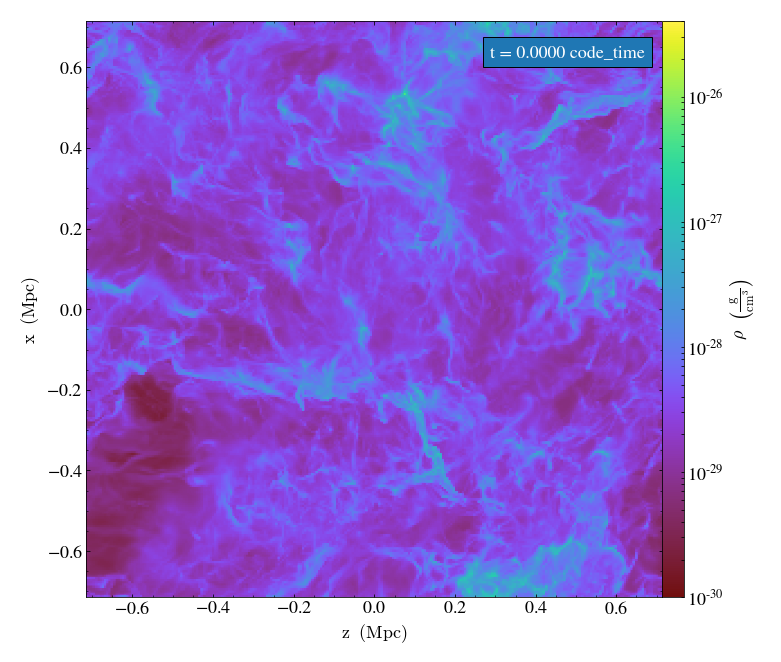

yt : [INFO     ] 2019-03-18 13:46:11,768 Parameters: current_time              = 1.0000001841031177e-05
yt : [INFO     ] 2019-03-18 13:46:11,769 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 13:46:11,770 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 13:46:11,771 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 13:46:11,772 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 13:46:11,772 Parameters: current_redshift          = 99998.98158969163
yt : [INFO     ] 2019-03-18 13:46:11,773 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 13:46:11,774 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 13:46:11,774 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-18 13:46:19,404 Projection completed
yt : [INFO     ] 2019-03-18 13:46:19,405 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-03-18 13:46:19,406 ylim = 0.00


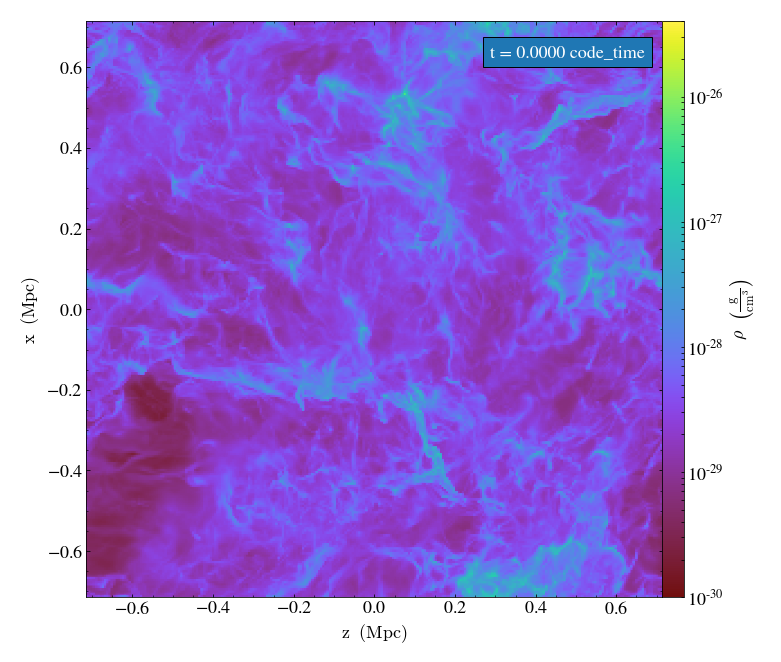

yt : [INFO     ] 2019-03-18 13:46:20,354 Parameters: current_time              = 1.0000004458924037e-05
yt : [INFO     ] 2019-03-18 13:46:20,355 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 13:46:20,356 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 13:46:20,357 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 13:46:20,358 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 13:46:20,359 Parameters: current_redshift          = 99998.95541077951
yt : [INFO     ] 2019-03-18 13:46:20,359 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 13:46:20,360 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 13:46:20,361 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-18 13:46:28,092 Projection completed
yt : [INFO     ] 2019-03-18 13:46:28,094 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-03-18 13:46:28,094 ylim = 0.00


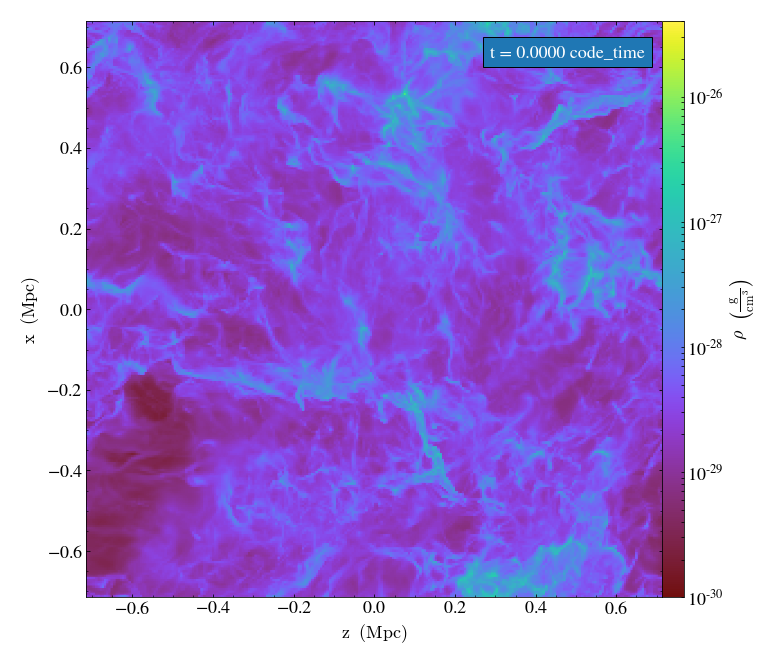

yt : [INFO     ] 2019-03-18 13:46:29,105 Parameters: current_time              = 1.0000007152275187e-05
yt : [INFO     ] 2019-03-18 13:46:29,106 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 13:46:29,107 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 13:46:29,108 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 13:46:29,109 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 13:46:29,110 Parameters: current_redshift          = 99998.92847729928
yt : [INFO     ] 2019-03-18 13:46:29,110 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 13:46:29,111 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 13:46:29,112 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-18 13:46:36,978 Projection completed
yt : [INFO     ] 2019-03-18 13:46:36,979 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-03-18 13:46:36,980 ylim = 0.00


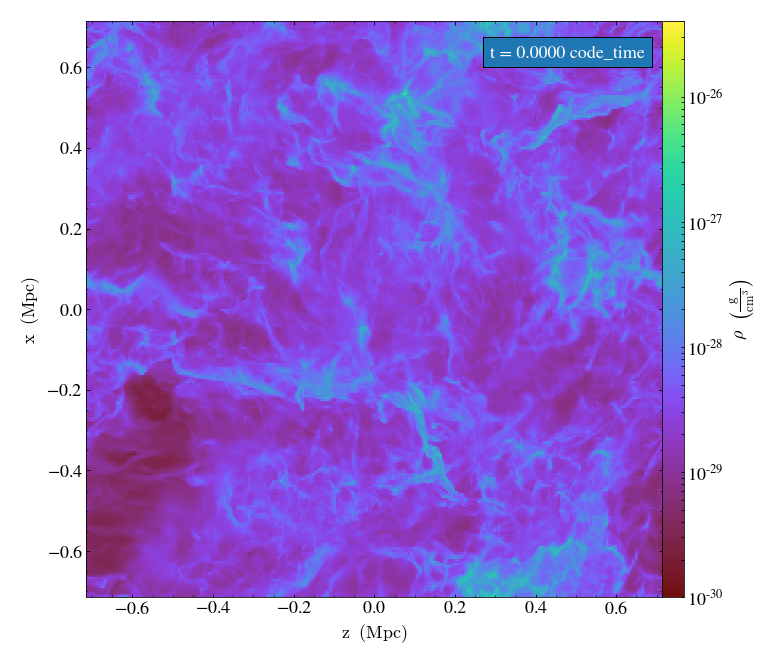

yt : [INFO     ] 2019-03-18 13:46:37,981 Parameters: current_time              = 1.0000009746218316e-05
yt : [INFO     ] 2019-03-18 13:46:37,982 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 13:46:37,983 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 13:46:37,984 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 13:46:37,985 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 13:46:37,986 Parameters: current_redshift          = 99998.90253791184
yt : [INFO     ] 2019-03-18 13:46:37,986 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 13:46:37,987 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 13:46:37,988 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-18 13:46:45,874 Projection completed
yt : [INFO     ] 2019-03-18 13:46:45,875 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-03-18 13:46:45,876 ylim = 0.00


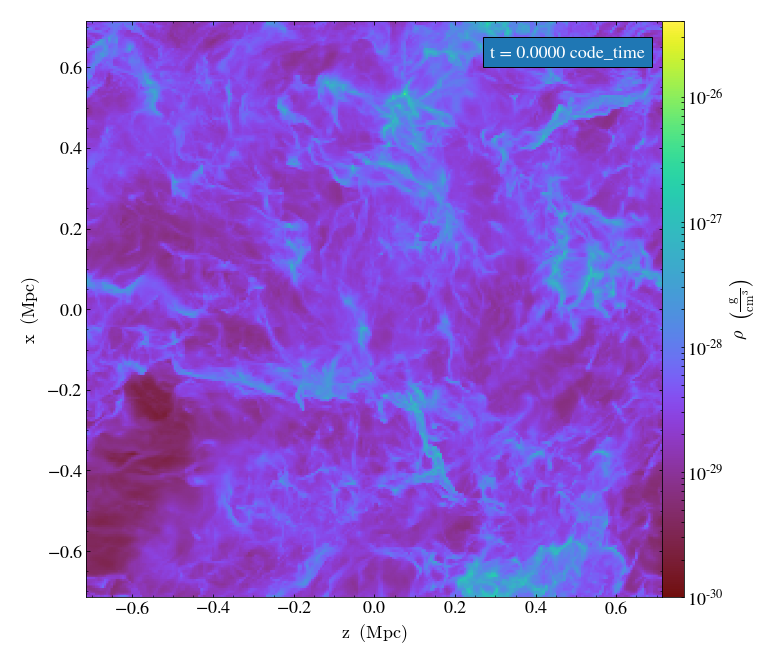

yt : [INFO     ] 2019-03-18 13:46:46,930 Parameters: current_time              = 1.0000012293896476e-05
yt : [INFO     ] 2019-03-18 13:46:46,931 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 13:46:46,932 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 13:46:46,933 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 13:46:46,934 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 13:46:46,934 Parameters: current_redshift          = 99998.87706118639
yt : [INFO     ] 2019-03-18 13:46:46,935 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 13:46:46,936 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 13:46:46,937 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-18 13:46:54,311 Projection completed
yt : [INFO     ] 2019-03-18 13:46:54,313 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-03-18 13:46:54,313 ylim = 0.00


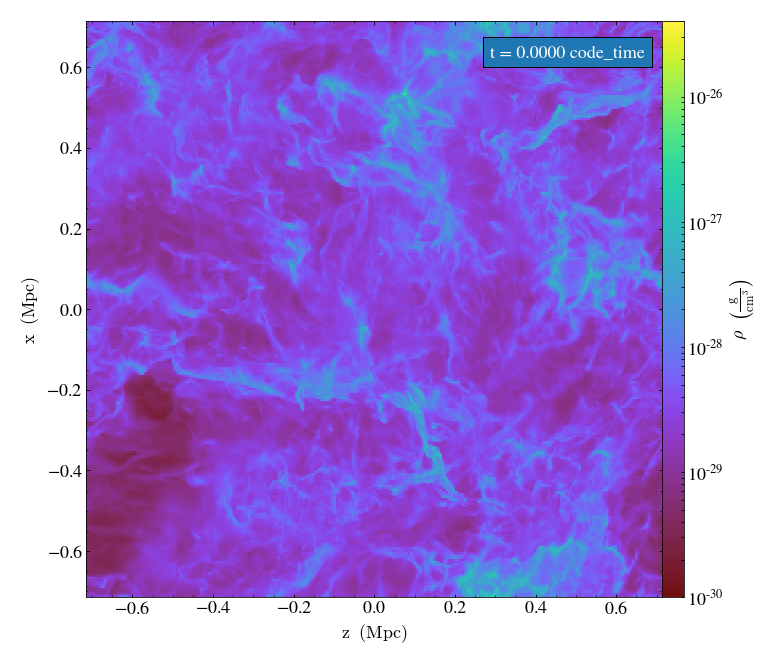

yt : [INFO     ] 2019-03-18 13:46:55,300 Parameters: current_time              = 1.0000014342343237e-05
yt : [INFO     ] 2019-03-18 13:46:55,301 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 13:46:55,302 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 13:46:55,303 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 13:46:55,304 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 13:46:55,305 Parameters: current_redshift          = 99998.85657677334
yt : [INFO     ] 2019-03-18 13:46:55,305 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 13:46:55,306 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 13:46:55,307 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-18 13:47:03,087 Projection completed
yt : [INFO     ] 2019-03-18 13:47:03,089 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-03-18 13:47:03,090 ylim = 0.00


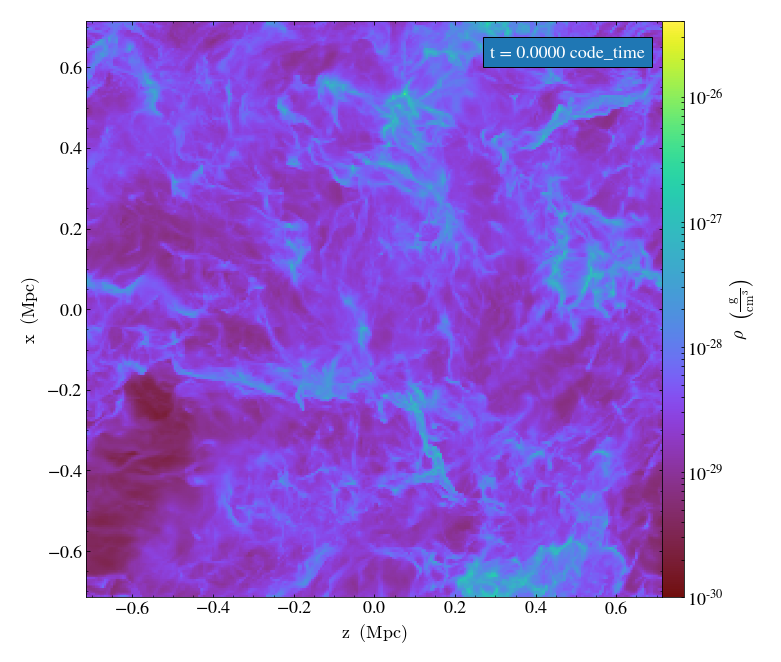

yt : [INFO     ] 2019-03-18 13:47:04,116 Parameters: current_time              = 1.0000016614904162e-05
yt : [INFO     ] 2019-03-18 13:47:04,117 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 13:47:04,118 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 13:47:04,119 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 13:47:04,120 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 13:47:04,121 Parameters: current_redshift          = 99998.83385123443
yt : [INFO     ] 2019-03-18 13:47:04,121 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 13:47:04,122 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 13:47:04,123 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-18 13:47:11,985 Projection completed
yt : [INFO     ] 2019-03-18 13:47:11,986 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-03-18 13:47:11,987 ylim = 0.00


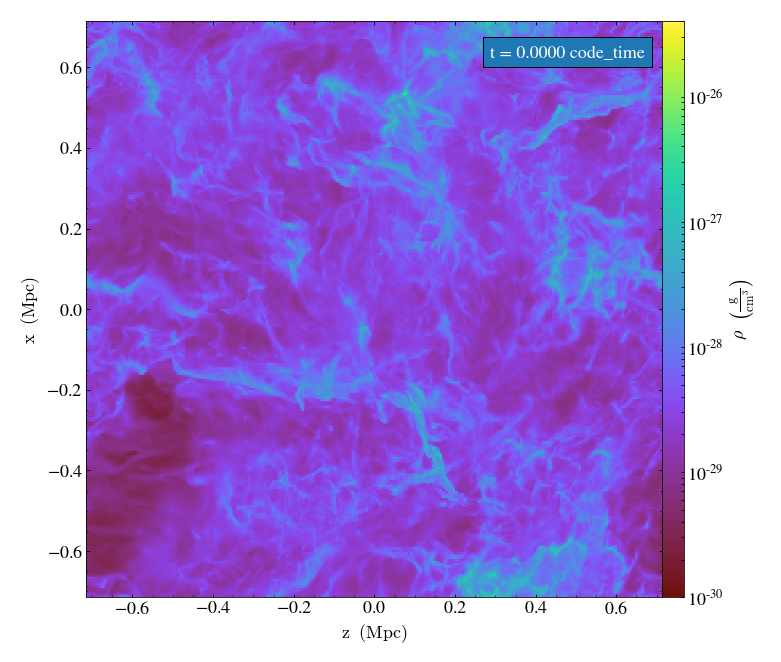

yt : [INFO     ] 2019-03-18 13:47:13,037 Parameters: current_time              = 1.0000018288579861e-05
yt : [INFO     ] 2019-03-18 13:47:13,038 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 13:47:13,039 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 13:47:13,040 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 13:47:13,042 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 13:47:13,043 Parameters: current_redshift          = 99998.81711453586
yt : [INFO     ] 2019-03-18 13:47:13,043 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 13:47:13,044 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 13:47:13,045 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-18 13:47:21,342 Projection completed
yt : [INFO     ] 2019-03-18 13:47:21,344 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-03-18 13:47:21,344 ylim = 0.00


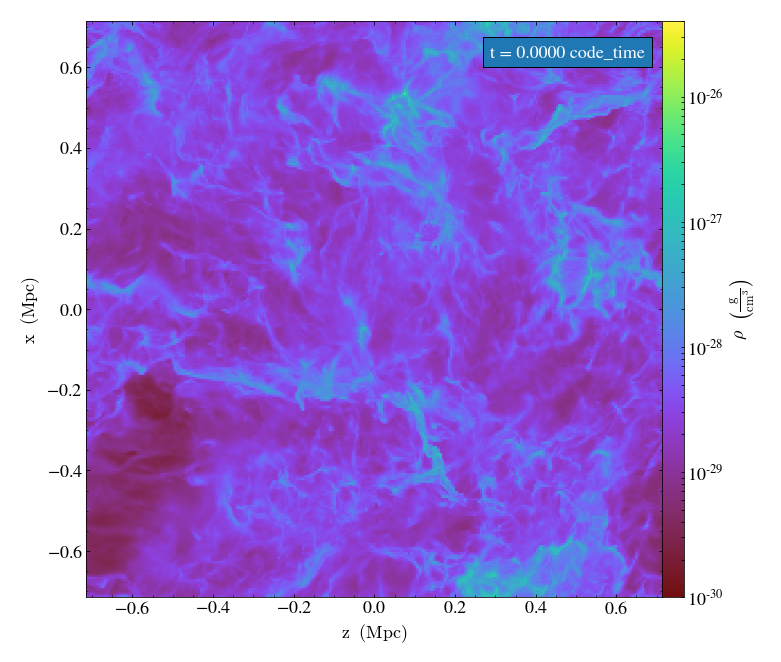

yt : [INFO     ] 2019-03-18 13:47:22,461 Parameters: current_time              = 1.000002099137004e-05
yt : [INFO     ] 2019-03-18 13:47:22,462 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 13:47:22,463 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 13:47:22,464 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 13:47:22,465 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 13:47:22,466 Parameters: current_redshift          = 99998.79008674023
yt : [INFO     ] 2019-03-18 13:47:22,466 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 13:47:22,467 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 13:47:22,468 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-18 13:47:30,420 Projection completed
yt : [INFO     ] 2019-03-18 13:47:30,422 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-03-18 13:47:30,423 ylim = 0.000


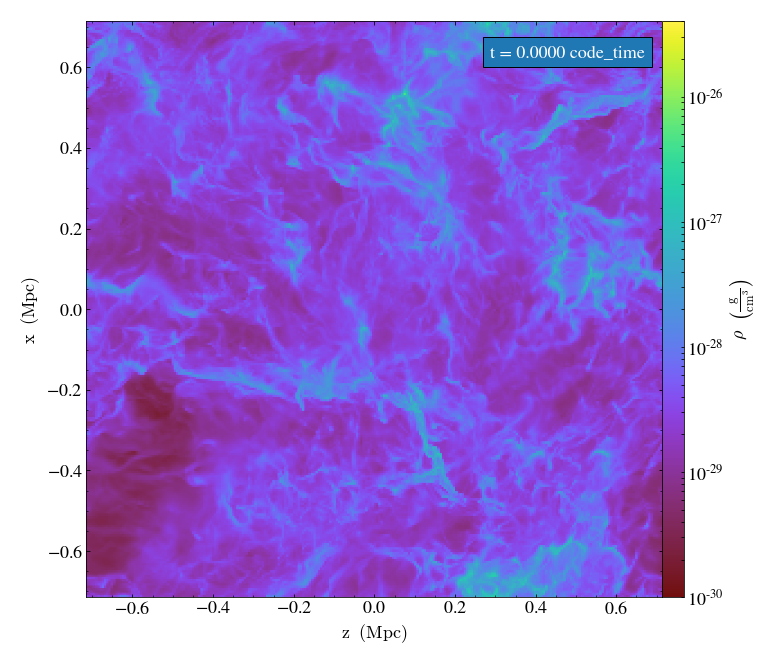

yt : [INFO     ] 2019-03-18 13:47:31,456 Parameters: current_time              = 1.0000022906338907e-05
yt : [INFO     ] 2019-03-18 13:47:31,457 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 13:47:31,458 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 13:47:31,459 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 13:47:31,460 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 13:47:31,461 Parameters: current_redshift          = 99998.77093713563
yt : [INFO     ] 2019-03-18 13:47:31,462 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 13:47:31,462 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 13:47:31,463 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-18 13:47:39,297 Projection completed
yt : [INFO     ] 2019-03-18 13:47:39,298 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-03-18 13:47:39,299 ylim = 0.00


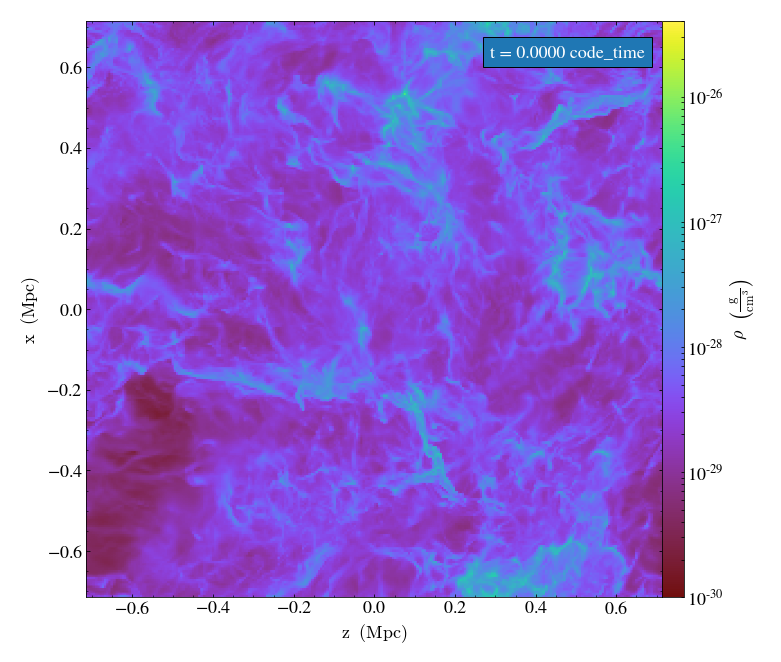

yt : [INFO     ] 2019-03-18 13:47:40,335 Parameters: current_time              = 1.000002569217582e-05
yt : [INFO     ] 2019-03-18 13:47:40,336 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 13:47:40,337 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 13:47:40,338 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 13:47:40,339 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 13:47:40,340 Parameters: current_redshift          = 99998.74307890188
yt : [INFO     ] 2019-03-18 13:47:40,341 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 13:47:40,342 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 13:47:40,343 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-18 13:47:48,158 Projection completed
yt : [INFO     ] 2019-03-18 13:47:48,159 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-03-18 13:47:48,160 ylim = 0.000


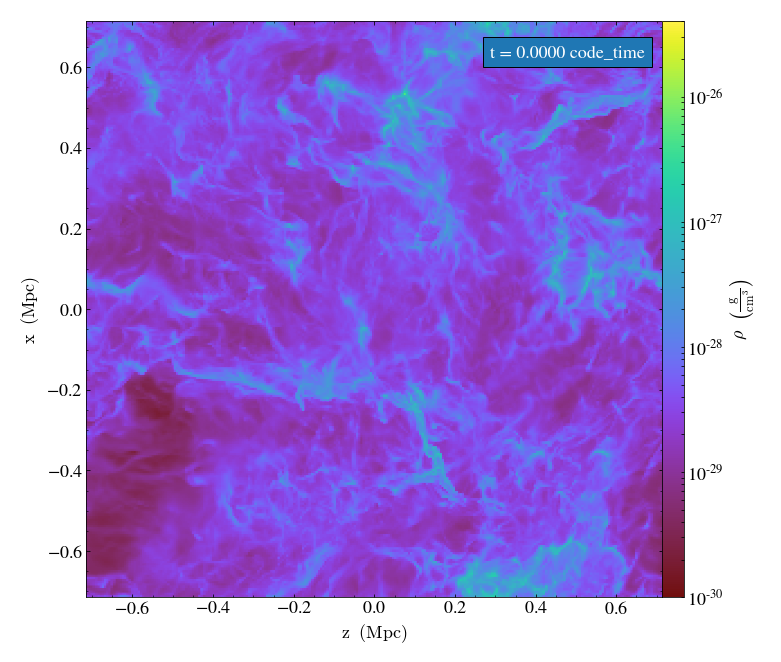

yt : [INFO     ] 2019-03-18 13:47:49,187 Parameters: current_time              = 1.0000028609136235e-05
yt : [INFO     ] 2019-03-18 13:47:49,192 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 13:47:49,193 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 13:47:49,194 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 13:47:49,195 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 13:47:49,196 Parameters: current_redshift          = 99998.71390945613
yt : [INFO     ] 2019-03-18 13:47:49,197 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 13:47:49,197 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 13:47:49,198 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-18 13:47:57,183 Projection completed
yt : [INFO     ] 2019-03-18 13:47:57,184 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-03-18 13:47:57,185 ylim = 0.00


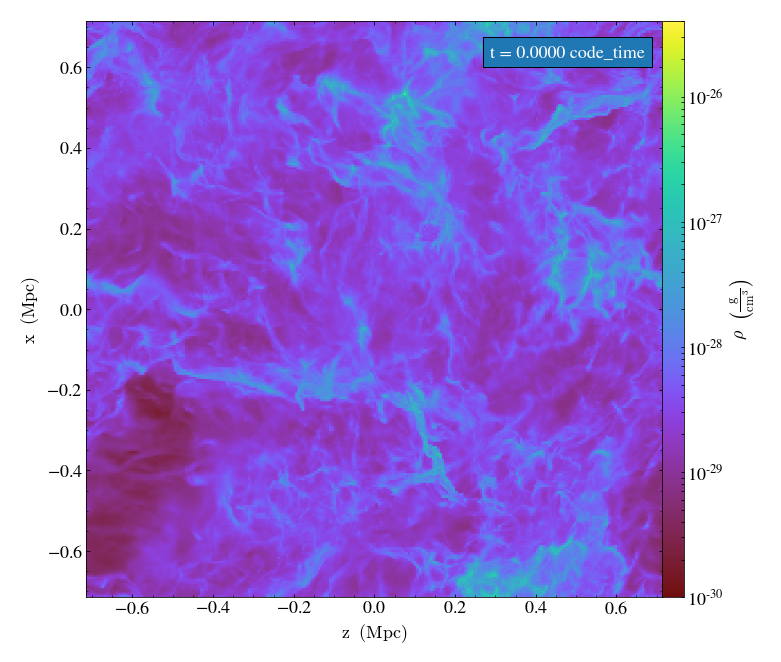

yt : [INFO     ] 2019-03-18 13:47:58,210 Parameters: current_time              = 1.000003137187395e-05
yt : [INFO     ] 2019-03-18 13:47:58,210 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 13:47:58,211 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 13:47:58,212 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 13:47:58,213 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 13:47:58,214 Parameters: current_redshift          = 99998.6862822447
yt : [INFO     ] 2019-03-18 13:47:58,215 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 13:47:58,216 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 13:47:58,216 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-18 13:48:06,658 Projection completed
yt : [INFO     ] 2019-03-18 13:48:06,660 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-03-18 13:48:06,660 ylim = 0.0000


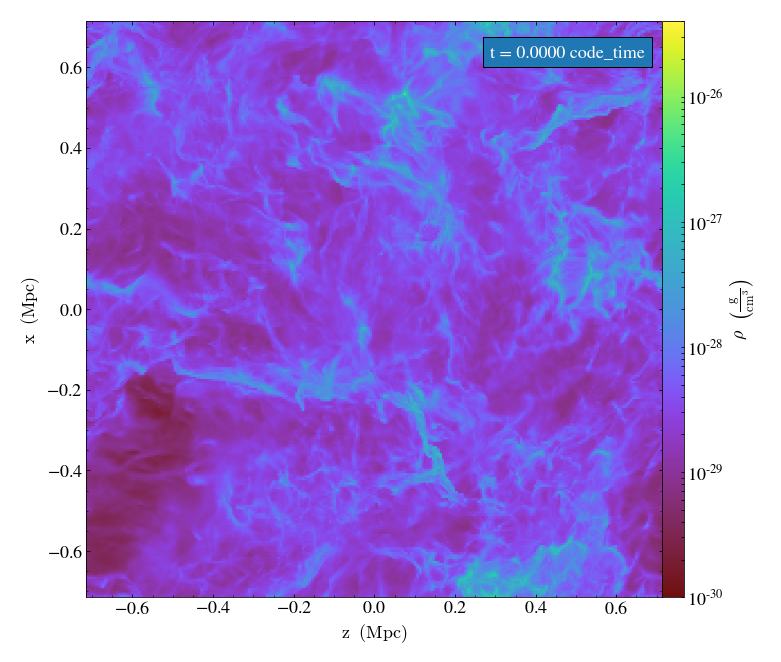

yt : [INFO     ] 2019-03-18 13:48:07,672 Parameters: current_time              = 1.0000034186532752e-05
yt : [INFO     ] 2019-03-18 13:48:07,673 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 13:48:07,674 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 13:48:07,675 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 13:48:07,676 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 13:48:07,677 Parameters: current_redshift          = 99998.6581358412
yt : [INFO     ] 2019-03-18 13:48:07,677 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 13:48:07,678 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 13:48:07,679 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-18 13:48:15,811 Projection completed
yt : [INFO     ] 2019-03-18 13:48:15,813 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-03-18 13:48:15,813 ylim = 0.000


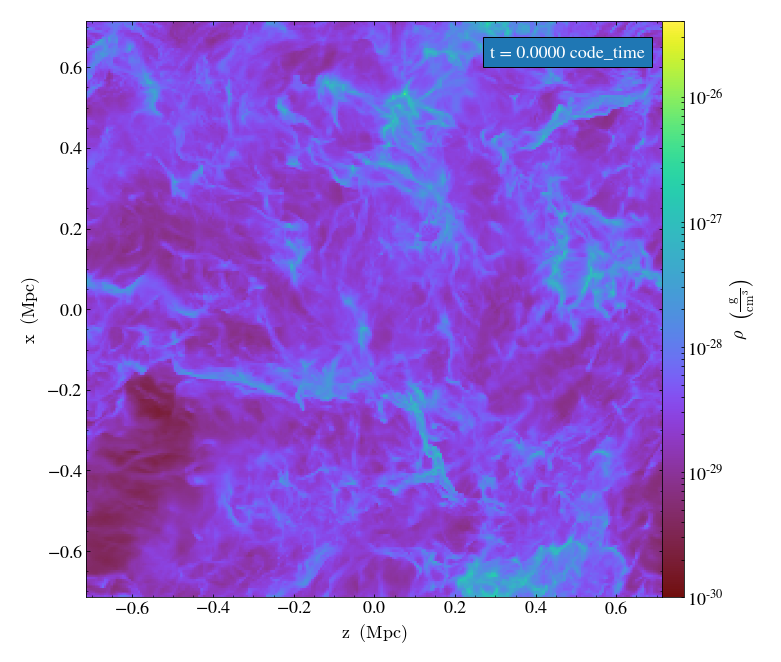

yt : [INFO     ] 2019-03-18 13:48:16,844 Parameters: current_time              = 1.000003701333829e-05
yt : [INFO     ] 2019-03-18 13:48:16,845 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 13:48:16,846 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 13:48:16,848 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 13:48:16,849 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 13:48:16,850 Parameters: current_redshift          = 99998.6298679871
yt : [INFO     ] 2019-03-18 13:48:16,851 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 13:48:16,851 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 13:48:16,852 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-18 13:48:24,602 Projection completed
yt : [INFO     ] 2019-03-18 13:48:24,604 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-03-18 13:48:24,605 ylim = 0.0000


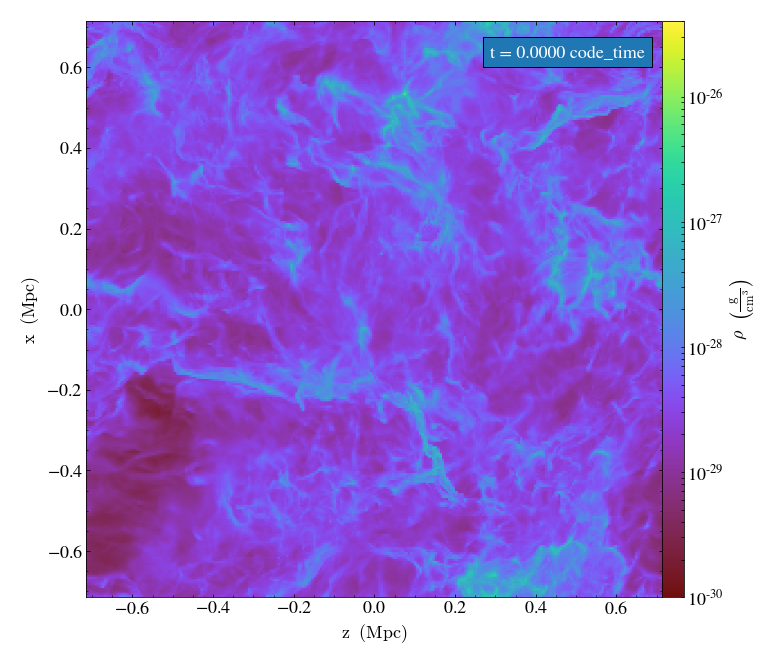

yt : [INFO     ] 2019-03-18 13:48:25,624 Parameters: current_time              = 1.0000037753940052e-05
yt : [INFO     ] 2019-03-18 13:48:25,625 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 13:48:25,626 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 13:48:25,627 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 13:48:25,628 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 13:48:25,629 Parameters: current_redshift          = 99998.62246202482
yt : [INFO     ] 2019-03-18 13:48:25,630 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 13:48:25,631 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 13:48:25,632 Parameters: hubble_constant           = 0.7


KeyboardInterrupt: 

In [13]:
for ds in ts.piter():
    
    sz = yt.ProjectionPlot(ds,'y','density',weight_field='density')
    sz.set_zlim(field,1e-30,4e-26)
    sz.set_log(field,True)
    sz.set_cmap(field,colormap)
#     sz.set_unit(field,'g/cm**3')
#     sz.set_axes_unit('kpc')
    sz.annotate_timestamp(time_unit='code_time',corner='upper_right',
                         time_format='t = {time:.4f} {units}')
#     sz.annotate_grids(periodic=False)
    sz.show()
#     sz.save(name='ProjectionPlot_Density_' + str(ds) + '.png')

yt : [INFO     ] 2019-02-26 14:03:52,728 Parameters: current_time              = 1e-05
yt : [INFO     ] 2019-02-26 14:03:52,729 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-02-26 14:03:52,730 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-02-26 14:03:52,731 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-02-26 14:03:52,732 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-02-26 14:03:52,732 Parameters: current_redshift          = 99998.99999999999
yt : [INFO     ] 2019-02-26 14:03:52,733 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-02-26 14:03:52,733 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-02-26 14:03:52,733 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-02-26 14:03:53,479 Setting default field to ('gas', 'density')
yt : [INFO     ] 2019-02-26 14:03:53,493 Rendering scene (Can take a while).
yt : [INFO     ] 2019-02-26 14:03:5

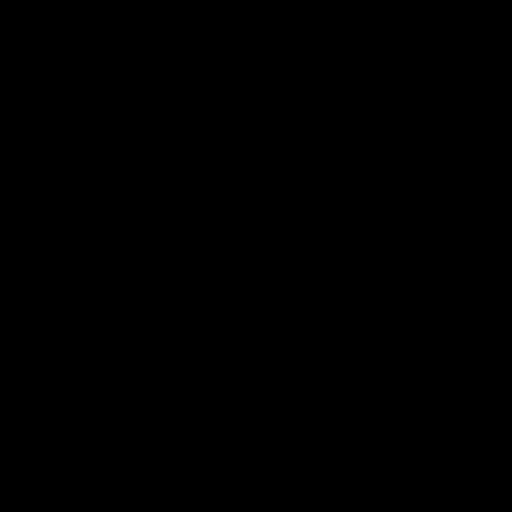

OSError: Unable to open file (unable to open file: name = 'Data_000001', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [12]:
for ds in ts.piter():
    ds.periodicity = (True,True,True)

    sc = yt.create_scene(ds, lens_type='perspective')

    sc.camera.set_width(ds.quan(100,'kpc'))
    source = sc[0]

    # source.tfh.set_bounds((1e-31, 5e-26))
    # source.tfh.set_log(True)
    # source.tfh.grey_opacity = False

    source.set_field('density')
    source.set_log(True)
    # source.set_use_ghost_zones(True)

    bounds = (3.5e-3, 1e2)

    # Since this rendering is done in log space, the transfer function needs
    # to be specified in log space.
    tf = yt.ColorTransferFunction(np.log10(bounds))

    tf.add_layers(5, colormap='viridis_r')

    source.tfh.tf = tf
    source.tfh.bounds = bounds

    # sc.camera.zoom(5)
    sc.show(sigma_clip=4.0)
#     sc.save(fname=str(ds) + '_vol_render.png',sigma_clip=6.0)

In [14]:
fields = ['density','velocity_magnitude','velocity_x','velocity_y',
          'velocity_z']

In [ ]:
for i in fields:
    for j in ['x','y','z']:
        for ds in ts.piter():
            s = yt.SlicePlot(ds,j,i)
#             s.show()
            s.save(name='mar6_run/images/' + str(ds)+ '_' + str(i)+ '_' + str(j) + '_slice.png')

In [44]:
for ds in ts:
    print(ts.outputs.index("mar6_run/"+str(ds)))

yt : [INFO     ] 2019-03-11 22:44:04,398 Parameters: current_time              = 1e-05
yt : [INFO     ] 2019-03-11 22:44:04,399 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-11 22:44:04,400 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-11 22:44:04,401 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-11 22:44:04,402 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-11 22:44:04,403 Parameters: current_redshift          = 99998.99999999999
yt : [INFO     ] 2019-03-11 22:44:04,404 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-11 22:44:04,405 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-11 22:44:04,406 Parameters: hubble_constant           = 0.7


0


yt : [INFO     ] 2019-03-11 22:44:04,796 Parameters: current_time              = 1.0000001841031177e-05
yt : [INFO     ] 2019-03-11 22:44:04,796 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-11 22:44:04,797 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-11 22:44:04,798 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-11 22:44:04,799 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-11 22:44:04,800 Parameters: current_redshift          = 99998.98158969163
yt : [INFO     ] 2019-03-11 22:44:04,800 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-11 22:44:04,801 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-11 22:44:04,802 Parameters: hubble_constant           = 0.7


1


yt : [INFO     ] 2019-03-11 22:44:05,109 Parameters: current_time              = 1.0000004458924037e-05
yt : [INFO     ] 2019-03-11 22:44:05,110 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-11 22:44:05,111 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-11 22:44:05,112 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-11 22:44:05,113 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-11 22:44:05,113 Parameters: current_redshift          = 99998.95541077951
yt : [INFO     ] 2019-03-11 22:44:05,114 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-11 22:44:05,115 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-11 22:44:05,115 Parameters: hubble_constant           = 0.7


2


yt : [INFO     ] 2019-03-11 22:44:05,504 Parameters: current_time              = 1.0000007152275187e-05
yt : [INFO     ] 2019-03-11 22:44:05,505 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-11 22:44:05,506 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-11 22:44:05,507 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-11 22:44:05,508 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-11 22:44:05,508 Parameters: current_redshift          = 99998.92847729928
yt : [INFO     ] 2019-03-11 22:44:05,509 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-11 22:44:05,510 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-11 22:44:05,510 Parameters: hubble_constant           = 0.7


3


yt : [INFO     ] 2019-03-11 22:44:05,823 Parameters: current_time              = 1.0000009746218316e-05
yt : [INFO     ] 2019-03-11 22:44:05,824 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-11 22:44:05,825 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-11 22:44:05,826 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-11 22:44:05,827 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-11 22:44:05,828 Parameters: current_redshift          = 99998.90253791184
yt : [INFO     ] 2019-03-11 22:44:05,829 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-11 22:44:05,829 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-11 22:44:05,830 Parameters: hubble_constant           = 0.7


4


yt : [INFO     ] 2019-03-11 22:44:06,220 Parameters: current_time              = 1.0000012293896476e-05
yt : [INFO     ] 2019-03-11 22:44:06,221 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-11 22:44:06,222 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-11 22:44:06,223 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-11 22:44:06,224 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-11 22:44:06,225 Parameters: current_redshift          = 99998.87706118639
yt : [INFO     ] 2019-03-11 22:44:06,226 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-11 22:44:06,226 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-11 22:44:06,227 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-11 22:44:06,536 Parameters: current_time              = 1.0000014342343237e-05


5


yt : [INFO     ] 2019-03-11 22:44:06,537 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-11 22:44:06,538 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-11 22:44:06,539 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-11 22:44:06,540 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-11 22:44:06,541 Parameters: current_redshift          = 99998.85657677334
yt : [INFO     ] 2019-03-11 22:44:06,541 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-11 22:44:06,542 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-11 22:44:06,543 Parameters: hubble_constant           = 0.7


6


yt : [INFO     ] 2019-03-11 22:44:06,931 Parameters: current_time              = 1.0000016614904162e-05
yt : [INFO     ] 2019-03-11 22:44:06,932 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-11 22:44:06,933 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-11 22:44:06,934 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-11 22:44:06,934 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-11 22:44:06,935 Parameters: current_redshift          = 99998.83385123443
yt : [INFO     ] 2019-03-11 22:44:06,936 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-11 22:44:06,936 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-11 22:44:06,937 Parameters: hubble_constant           = 0.7


7


yt : [INFO     ] 2019-03-11 22:44:07,246 Parameters: current_time              = 1.0000018288579861e-05
yt : [INFO     ] 2019-03-11 22:44:07,247 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-11 22:44:07,248 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-11 22:44:07,249 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-11 22:44:07,250 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-11 22:44:07,251 Parameters: current_redshift          = 99998.81711453586
yt : [INFO     ] 2019-03-11 22:44:07,251 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-11 22:44:07,252 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-11 22:44:07,253 Parameters: hubble_constant           = 0.7


8


yt : [INFO     ] 2019-03-11 22:44:07,641 Parameters: current_time              = 1.000002099137004e-05
yt : [INFO     ] 2019-03-11 22:44:07,642 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-11 22:44:07,643 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-11 22:44:07,643 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-11 22:44:07,644 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-11 22:44:07,645 Parameters: current_redshift          = 99998.79008674023
yt : [INFO     ] 2019-03-11 22:44:07,645 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-11 22:44:07,646 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-11 22:44:07,647 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-11 22:44:07,957 Parameters: current_time              = 1.0000022906338907e-05
yt : [INFO     ] 2019-03-11 22:44:07,957 Parameters: domain_dimensions       

9


yt : [INFO     ] 2019-03-11 22:44:07,962 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-11 22:44:07,963 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-11 22:44:08,351 Parameters: current_time              = 1.000002569217582e-05
yt : [INFO     ] 2019-03-11 22:44:08,352 Parameters: domain_dimensions         = [256 256 256]


10


yt : [INFO     ] 2019-03-11 22:44:08,353 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-11 22:44:08,354 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-11 22:44:08,356 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-11 22:44:08,356 Parameters: current_redshift          = 99998.74307890188
yt : [INFO     ] 2019-03-11 22:44:08,357 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-11 22:44:08,358 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-11 22:44:08,359 Parameters: hubble_constant           = 0.7


11


yt : [INFO     ] 2019-03-11 22:44:08,736 Parameters: current_time              = 1.0000028609136235e-05
yt : [INFO     ] 2019-03-11 22:44:08,737 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-11 22:44:08,738 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-11 22:44:08,739 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-11 22:44:08,740 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-11 22:44:08,741 Parameters: current_redshift          = 99998.71390945613
yt : [INFO     ] 2019-03-11 22:44:08,741 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-11 22:44:08,742 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-11 22:44:08,743 Parameters: hubble_constant           = 0.7


12


yt : [INFO     ] 2019-03-11 22:44:09,141 Parameters: current_time              = 1.000003137187395e-05
yt : [INFO     ] 2019-03-11 22:44:09,141 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-11 22:44:09,142 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-11 22:44:09,143 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-11 22:44:09,144 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-11 22:44:09,145 Parameters: current_redshift          = 99998.6862822447
yt : [INFO     ] 2019-03-11 22:44:09,146 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-11 22:44:09,147 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-11 22:44:09,147 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-11 22:44:09,527 Parameters: current_time              = 1.0000034186532752e-05


13


yt : [INFO     ] 2019-03-11 22:44:09,527 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-11 22:44:09,529 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-11 22:44:09,530 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-11 22:44:09,531 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-11 22:44:09,531 Parameters: current_redshift          = 99998.6581358412
yt : [INFO     ] 2019-03-11 22:44:09,532 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-11 22:44:09,533 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-11 22:44:09,533 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-11 22:44:09,931 Parameters: current_time              = 1.000003701333829e-05


14


yt : [INFO     ] 2019-03-11 22:44:09,932 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-11 22:44:09,933 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-11 22:44:09,934 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-11 22:44:09,935 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-11 22:44:09,936 Parameters: current_redshift          = 99998.6298679871
yt : [INFO     ] 2019-03-11 22:44:09,937 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-11 22:44:09,937 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-11 22:44:09,938 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-11 22:44:10,253 Parameters: current_time              = 1.0000037753940052e-05
yt : [INFO     ] 2019-03-11 22:44:10,254 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-11 22:44:10,255 Parameters: domain_left_edge          = [0. 0

15


yt : [INFO     ] 2019-03-11 22:44:10,257 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-11 22:44:10,258 Parameters: current_redshift          = 99998.62246202482
yt : [INFO     ] 2019-03-11 22:44:10,259 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-11 22:44:10,259 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-11 22:44:10,260 Parameters: hubble_constant           = 0.7


16


KeyboardInterrupt: 

In [7]:
M_s = np.full(len(ts),np.nan)
rho = np.full(len(ts),np.nan)
t = np.full(len(ts),np.nan)
ct = np.full(len(ts),np.nan)
cfl = np.full(len(ts),np.nan)
temp = np.full(len(ts),np.nan)

for ds in ts:

    i = ts.outputs.index("mar6_run/"+str(ds))

    cg = ds.covering_grid(0, left_edge = [0.0,0.0,0.0], dims=[256,256,256])
    cg.get_data(["mach_number","density","temperature","courant_time_step","velocity_x","velocity_y",
                 "velocity_z","dx","dy","dz"])
    
    CFL = ( cg["velocity_x"] * (cg["courant_time_step"]) / cg["dx"] + 
            cg["velocity_y"] * (cg["courant_time_step"]) / cg["dy"] + 
            cg["velocity_z"] * (cg["courant_time_step"]) / cg["dz"] )

    
    M_s[i] = (cg["mach_number"].mean().in_cgs())
    rho[i] = (cg["density"].mean().in_cgs())
    t[i] = (ds.current_time)
    ct[i] = (cg["courant_time_step"].mean())
    cfl[i] = CFL.mean().in_cgs()
    temp[i] = cg["temperature"].mean().in_cgs()
    
# plt.scatter(t, (np.array(M_s)).mean(),c='k')
# plt.xlim(1e-5,1.000001e-5)
# plt.show()

# plt.scatter(t, (np.array(rho)).mean(),c='k')
# plt.xlim(1e-5,1.000001e-5)
# plt.show()


yt : [INFO     ] 2019-03-18 12:26:58,839 Parameters: current_time              = 1e-05
yt : [INFO     ] 2019-03-18 12:26:58,840 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 12:26:58,841 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 12:26:58,842 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 12:26:58,843 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 12:26:58,844 Parameters: current_redshift          = 99998.99999999999
yt : [INFO     ] 2019-03-18 12:26:58,844 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 12:26:58,845 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 12:26:58,846 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-18 12:27:14,599 Parameters: current_time              = 1.0000001841031177e-05
yt : [INFO     ] 2019-03-18 12:27:14,601 Parameters: domain_dimensions         = [256 256 256

yt : [INFO     ] 2019-03-18 12:29:47,550 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 12:29:47,552 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 12:29:47,553 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 12:29:47,554 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 12:29:47,554 Parameters: current_redshift          = 99998.77093713563
yt : [INFO     ] 2019-03-18 12:29:47,555 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 12:29:47,556 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 12:29:47,557 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-18 12:30:05,604 Parameters: current_time              = 1.000002569217582e-05
yt : [INFO     ] 2019-03-18 12:30:05,606 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 12:30:05,607 Parameters: domain_left_edge          = [0. 0

yt : [INFO     ] 2019-03-18 12:32:42,736 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 12:32:42,737 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 12:32:42,738 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 12:32:42,739 Parameters: current_redshift          = 99998.54409642887
yt : [INFO     ] 2019-03-18 12:32:42,740 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 12:32:42,740 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 12:32:42,741 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-18 12:33:00,404 Parameters: current_time              = 1.0000047180421241e-05
yt : [INFO     ] 2019-03-18 12:33:00,406 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 12:33:00,407 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 12:33:00,408 Parameters: domain_right_edge         = [1. 1. 

yt : [INFO     ] 2019-03-18 12:35:34,539 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 12:35:34,540 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 12:35:34,541 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 12:35:34,542 Parameters: current_redshift          = 99998.27526287659
yt : [INFO     ] 2019-03-18 12:35:34,543 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 12:35:34,544 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 12:35:34,544 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-18 12:35:52,033 Parameters: current_time              = 1.0000074226105853e-05
yt : [INFO     ] 2019-03-18 12:35:52,034 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 12:35:52,036 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 12:35:52,037 Parameters: domain_right_edge         = [1. 1. 

yt : [INFO     ] 2019-03-18 12:38:25,572 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 12:38:25,573 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 12:38:25,574 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 12:38:25,575 Parameters: current_redshift          = 99998.01348725428
yt : [INFO     ] 2019-03-18 12:38:25,576 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 12:38:25,576 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 12:38:25,577 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-18 12:38:42,191 Parameters: current_time              = 1.000010229626696e-05
yt : [INFO     ] 2019-03-18 12:38:42,192 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 12:38:42,193 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 12:38:42,194 Parameters: domain_right_edge         = [1. 1. 1

yt : [INFO     ] 2019-03-18 12:41:21,754 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 12:41:21,755 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 12:41:21,756 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 12:41:21,757 Parameters: current_redshift          = 99997.50234302452
yt : [INFO     ] 2019-03-18 12:41:21,758 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 12:41:21,758 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 12:41:21,759 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-18 12:41:39,736 Parameters: current_time              = 1.0000155139598693e-05
yt : [INFO     ] 2019-03-18 12:41:39,738 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 12:41:39,739 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 12:41:39,741 Parameters: domain_right_edge         = [1. 1. 

yt : [INFO     ] 2019-03-18 12:44:15,899 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 12:44:15,900 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 12:44:15,901 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 12:44:15,902 Parameters: current_redshift          = 99996.89990026157
yt : [INFO     ] 2019-03-18 12:44:15,903 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 12:44:15,904 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 12:44:15,905 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-18 12:44:32,634 Parameters: current_time              = 1.0000217522851991e-05
yt : [INFO     ] 2019-03-18 12:44:32,636 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 12:44:32,638 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 12:44:32,639 Parameters: domain_right_edge         = [1. 1. 

yt : [INFO     ] 2019-03-18 12:47:08,977 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 12:47:08,978 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 12:47:08,979 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 12:47:08,980 Parameters: current_redshift          = 99996.19019531869
yt : [INFO     ] 2019-03-18 12:47:08,981 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 12:47:08,982 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 12:47:08,983 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-18 12:47:26,270 Parameters: current_time              = 1.000029153043619e-05
yt : [INFO     ] 2019-03-18 12:47:26,272 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 12:47:26,273 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 12:47:26,274 Parameters: domain_right_edge         = [1. 1. 1

yt : [INFO     ] 2019-03-18 12:49:58,571 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 12:49:58,572 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 12:49:58,574 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 12:49:58,575 Parameters: current_redshift          = 99995.38728042845
yt : [INFO     ] 2019-03-18 12:49:58,576 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 12:49:58,576 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 12:49:58,577 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-18 12:50:14,764 Parameters: current_time              = 1.0000364868999754e-05
yt : [INFO     ] 2019-03-18 12:50:14,765 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 12:50:14,768 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 12:50:14,769 Parameters: domain_right_edge         = [1. 1. 

yt : [INFO     ] 2019-03-18 12:52:47,504 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 12:52:47,505 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 12:52:47,506 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 12:52:47,507 Parameters: current_redshift          = 99994.6078470796
yt : [INFO     ] 2019-03-18 12:52:47,508 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 12:52:47,509 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 12:52:47,509 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-18 12:53:04,093 Parameters: current_time              = 1.0000452410556855e-05
yt : [INFO     ] 2019-03-18 12:53:04,094 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 12:53:04,095 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 12:53:04,096 Parameters: domain_right_edge         = [1. 1. 1

yt : [INFO     ] 2019-03-18 12:55:34,018 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 12:55:34,019 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-18 12:55:34,020 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-18 12:55:34,021 Parameters: current_redshift          = 99992.96555239771
yt : [INFO     ] 2019-03-18 12:55:34,022 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2019-03-18 12:55:34,022 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2019-03-18 12:55:34,023 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2019-03-18 12:55:50,614 Parameters: current_time              = 1.000062350289863e-05
yt : [INFO     ] 2019-03-18 12:55:50,616 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-18 12:55:50,617 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-18 12:55:50,618 Parameters: domain_right_edge         = [1. 1. 1

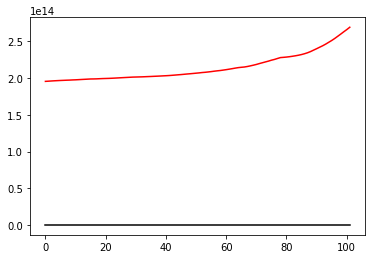

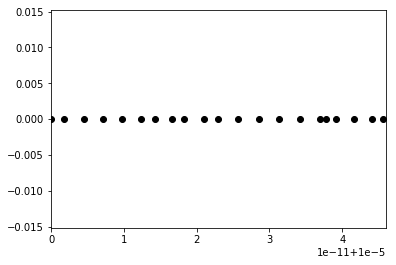

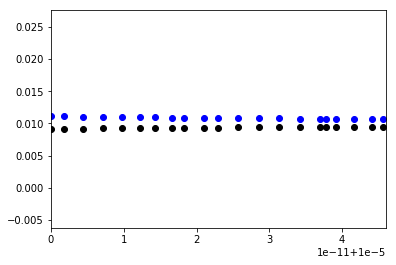

In [10]:


plt.plot(t,c='k')
plt.plot(ct,c='r')
# plt.xlim(1e-5,1.0000046e-5)
plt.show()

plt.scatter(t, rho,c='k')
plt.xlim(1e-5,1.0000046e-5)
plt.show()

plt.scatter(t, cfl/cfl.sum(),c='k')
plt.scatter(t, M_s/M_s.sum(),c='b')
plt.xlim(1e-5,1.0000046e-5)
plt.show()

In [ ]:
plt.plot(times,M_s_mean,label="Mean Mach number")
# plt.plot(times,M_s_max,label="Max Mach number")
# plt.plot(times,M_s_min,label="Min Mach number")
plt.ylabel("Mach number",fontsize=30)
plt.xlabel("Time",fontsize=30)
# plt.xlim(0.0026,0.0027)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

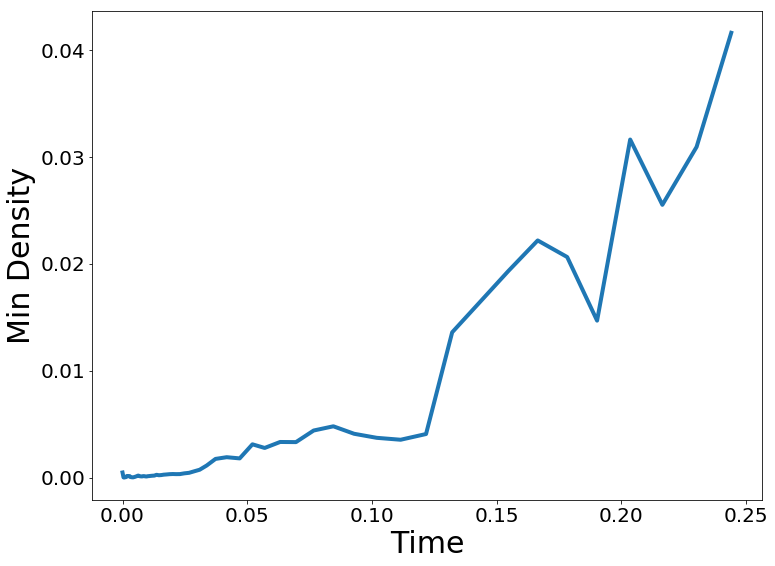

In [22]:
plt.plot(times, density_min,lw=4)
plt.ylabel("Min Density",fontsize=30)
plt.xlabel("Time",fontsize=30)
# pylab.xlim(0, 0.2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

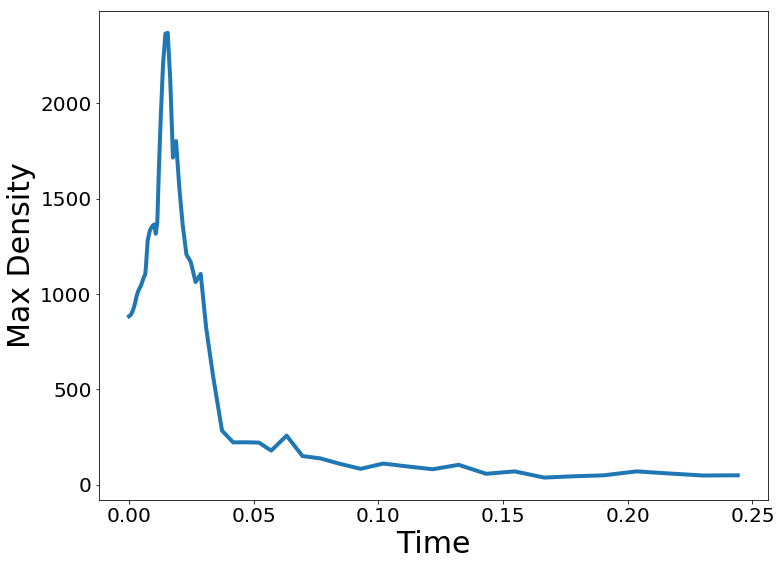

In [13]:
plt.plot(times, density_max,lw=4)
plt.ylabel("Max Density",fontsize=30)
plt.xlabel("Time",fontsize=30)
# pylab.xlim(0, 0.2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

/home/cwagner4/applications/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


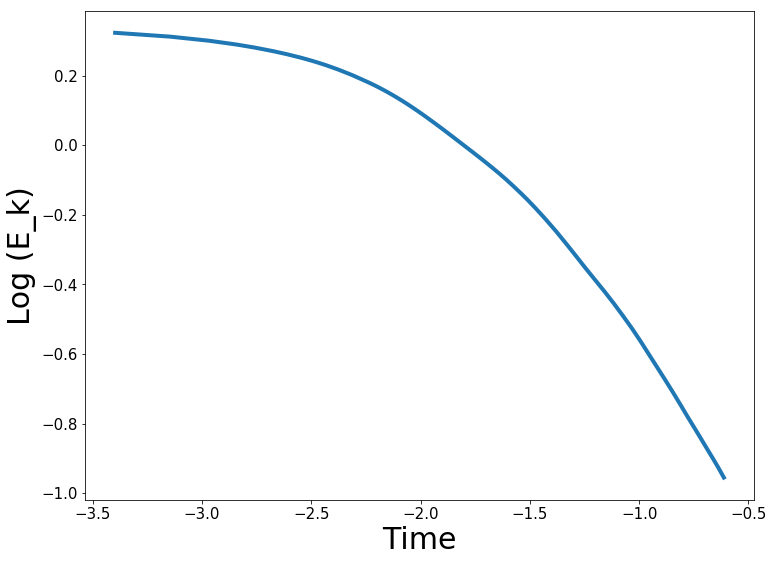

In [21]:
plt.plot(np.log10(times), np.log10(K_energy/np.mean(K_energy)),lw=4)
plt.ylabel("Log (E_k)",fontsize=30)
plt.xlabel("Time",fontsize=30)
# pylab.xlim(0, 0.2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()